<a href="https://colab.research.google.com/github/Tony6512/Internship-National-Lab/blob/main/MLDrilling_public.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This file is used to compare the IMP and PEF methods using machine learning (ML) algorithms. In particular, tree algorithms. Note that this file is an extension from the deep learning (DL) file.

# pip install

In [ ]:
# pip install eli5

In [ ]:
# !pip install keras-tuner -q

# Intro

In [ ]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import time
from time import perf_counter

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import KFold
from sklearn.model_selection import TimeSeriesSplit
# from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,
# BaggingClassifier, HistGradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier, StackingClassifier)

from sklearn.ensemble import (RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor,
BaggingRegressor, HistGradientBoostingRegressor, ExtraTreesRegressor, VotingRegressor, StackingRegressor)
from sklearn.multioutput import MultiOutputRegressor
import xgboost as xgb
from xgboost import XGBRegressor

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import roc_curve, auc, r2_score
from sklearn.model_selection import StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

SEED = 0


In [ ]:
# from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
# import eli5
# from eli5.sklearn import PermutationImportance
# from eli5.permutation_importance import get_score_importances

In [ ]:
# df_train = ### data goes here

In [ ]:
df_train.dtypes

LPN                      object
ld                       object
w                        object
r                        object
f                        object
p                        object
q                        object
s                        object
dp                       object
Azmuth                   object
Inclination              object
t_used                   object
d                        object
h                        object
mse                      object
dse                      object
p_mse                    object
p_dse                    object
duration_t               object
duration_ld              object
rk                       object
s2f                      object
qv                       object
df(bending_deg*dfc)      object
c_vol_f                  object
PressureDrop_s0          object
hook_load                object
GBoB                     object
wob_hkl_ref              object
del_bit_position         object
Lin_d_w                  object
sigm_ben

In [ ]:
df_train.head()

LPN        ld       w       r        f        p         q         s  \
0  num        ft    k-lb     RPM      gpm   ft/hr.  k-ft.-lb       psi   
1    0  7840.125  21.789  49.507  445.616   134.02    10.455   2941.82   
2    0  7840.158  21.761  49.384  444.789  133.767     9.141   2947.81   
3    0  7841.011  22.822  49.507  445.616  133.429    10.377   2972.09   
4    1  7841.175  22.739  49.507  444.797   104.28    11.535  2988.958   

        dp Azmuth  ... wob_hkl_ref del_bit_position    Lin_d_w  \
0      psi   deg.  ...        k-lb               ft  inch/k-lb   
1  588.918  11.46  ...       1.062            0.361          0   
2  594.914  11.46  ...       2.011            0.394          0   
3  619.195  11.46  ...      -0.251            0.853          0   
4  636.053  11.46  ...      -1.816            1.017          0   

       sigm_bending      w_cal     r_s_strength     s_s_severity Gamma_at_Bit  \
0              k lb      w_cal  drilling status  drilling status          tbd   
1                 0  45.469926                0                0       112.94   
2  135313236.100084 -88.896899                0                0       112.94   
3      537478.87647  45.618206                0                0       112.94   
4     384205.520343  44.193857                0                0       112.94   

  Block_Height be(bending_energy*dfc  
0           ft               ft^2-lb  
1       68.015                     0  
2       67.669                     0  
3       67.642                     0  
4       66.761                     0  

[5 rows x 38 columns]

In [ ]:
df_train['d'][0] ## unit check

'inch/rev.'

In [ ]:
df_train = df_train.loc[1:,:] ## exclude unit row

In [ ]:
df_train = df_train.astype('double')  ## convert to correct type

In [ ]:
df_train.head()

LPN        ld       w       r        f        p       q         s       dp  \
1  0.0  7840.125  21.789  49.507  445.616  134.020  10.455  2941.820  588.918   
2  0.0  7840.158  21.761  49.384  444.789  133.767   9.141  2947.810  594.914   
3  0.0  7841.011  22.822  49.507  445.616  133.429  10.377  2972.090  619.195   
4  1.0  7841.175  22.739  49.507  444.797  104.280  11.535  2988.958  636.053   
5  2.0  7841.208  19.414  49.683  445.608  102.184   8.365  2993.816  640.916   

   Azmuth  ...  wob_hkl_ref  del_bit_position   Lin_d_w  sigm_bending  \
1   11.46  ...        1.062             0.361  0.000000  0.000000e+00   
2   11.46  ...        2.011             0.394  0.000000  1.353132e+08   
3   11.46  ...       -0.251             0.853  0.000000  5.374789e+05   
4   11.46  ...       -1.816             1.017  0.000000  3.842055e+05   
5   11.46  ...      -97.767             1.050 -0.015815  3.613824e+05   

       w_cal  r_s_strength  s_s_severity  Gamma_at_Bit  Block_Height  \
1  45.469926           0.0           0.0        112.94        68.015   
2 -88.896899           0.0           0.0        112.94        67.669   
3  45.618206           0.0           0.0        112.94        67.642   
4  44.193857           0.0           0.0        112.94        66.761   
5  40.611140           0.0           0.0        112.94        66.761   

   be(bending_energy*dfc  
1                    0.0  
2                    0.0  
3                    0.0  
4                    0.0  
5                    0.0  

[5 rows x 38 columns]

In [ ]:
df_train.describe()

LPN            ld             w             r             f  \
count  19233.000000  19233.000000  19233.000000  19233.000000  19233.000000   
mean    9614.000156  10753.158519     17.810775     63.074834    456.520843   
std     5552.232929   1899.598714      6.305409     26.474645     14.808217   
min        0.000000   7840.125000      0.028000      8.547000    341.001000   
25%     4806.000000   8980.709000     12.989000     39.580000    451.367000   
50%     9614.000000  10487.566000     18.018000     69.537000    459.588000   
75%    14422.000000  12324.114000     22.515000     85.689000    459.588000   
max    19230.000000  14454.035000     39.415000    100.941000    494.797000   

                  p             q             s            dp        Azmuth  \
count  19233.000000  19233.000000  19233.000000  19233.000000  19233.000000   
mean     125.769101     10.553898   3196.926437    463.600421    131.294322   
std       59.443086      3.408023    398.986442    175.648332     45.032956   
min        9.992000      3.165000   1609.487000      0.391000      3.570000   
25%       73.526000      7.447000   2858.800000    325.175000    142.940000   
50%      131.940000     10.407000   3159.566000    525.493000    144.240000   
75%      178.814000     13.348000   3543.713000    610.855000    145.600000   
max      259.287000     20.050000   3987.066000    783.317000    175.530000   

       ...   wob_hkl_ref  del_bit_position       Lin_d_w  sigm_bending  \
count  ...  19233.000000      19233.000000  19233.000000  1.923300e+04   
mean   ...      8.259208         33.473136      0.003582  7.540551e+03   
std    ...      8.595265         28.028269      0.007627  9.759072e+05   
min    ...    -97.767000          0.032000     -0.059390  0.000000e+00   
25%    ...      2.960000         10.498000     -0.000321  5.786918e+00   
50%    ...      6.844000         26.477000      0.000815  7.091247e+00   
75%    ...     13.185000         50.591000      0.007669  1.650796e+01   
max    ...     37.684000        186.614000      0.086124  1.353132e+08   

              w_cal  r_s_strength  s_s_severity  Gamma_at_Bit  Block_Height  \
count  19233.000000  19233.000000  19233.000000  19233.000000  19233.000000   
mean      32.594684      0.331568      5.244437    234.315174     78.493806   
std        7.486835     13.623146     19.957692     92.897615     27.354672   
min      -88.896899      0.000000      0.000000   -999.250000     27.085000   
25%       26.351401      0.000000      0.000000    188.240000     55.330000   
50%       33.460097      0.000000      0.000000    211.760000     77.968000   
75%       38.548442      0.000000      0.000000    254.120000    101.893000   
max       51.855602    725.450000    429.235880   2599.000000    129.801000   

       be(bending_energy*dfc  
count           19233.000000  
mean            40798.633576  
std             18453.191031  
min                 0.000000  
25%             33819.684047  
50%             45276.393670  
75%             52919.900469  
max            110792.673051  

[8 rows x 38 columns]

In [ ]:
### choosing the features we are interested in
df = df_train.iloc[:,[1,2,3,4,5,6,7,8,12,14]]
# df = df_train.iloc[:,[1:8,12,14]]

In [ ]:
df

ld       w        r        f        p       q         s  \
1       7840.125  21.789   49.507  445.616  134.020  10.455  2941.820   
2       7840.158  21.761   49.384  444.789  133.767   9.141  2947.810   
3       7841.011  22.822   49.507  445.616  133.429  10.377  2972.090   
4       7841.175  22.739   49.507  444.797  104.280  11.535  2988.958   
5       7841.208  19.414   49.683  445.608  102.184   8.365  2993.816   
...          ...     ...      ...      ...      ...     ...       ...   
19229  14452.297  23.744   99.900  459.588  198.562  16.180  3925.787   
19230  14452.757  23.800   99.865  459.588  196.515  15.847  3932.894   
19231  14453.281  23.297  100.006  459.588  184.820  15.854  3931.763   
19232  14453.806  23.297   99.883  459.588  180.966  15.693  3928.572   
19233  14454.035  23.213  100.006  460.415  186.776  15.730  3916.737   

            dp         d         mse  
1      588.918  0.153799  104.097157  
2      594.914  0.153822  101.655735  
3      619.195  0.153121  108.413152  
4      636.053  0.119828  144.928438  
5      640.916  0.117148  138.773246  
...        ...       ...         ...  
19229  655.782  0.173732  115.004684  
19230  662.892  0.171967  115.718682  
19231  661.759  0.161633  122.998876  
19232  658.575  0.158348  124.625329  
19233  646.737  0.163179  119.913219  

[19233 rows x 10 columns]

Let us see what percent of the data is under a certain value.

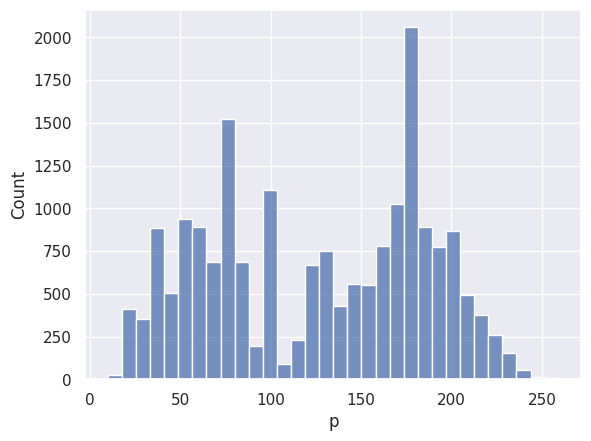

In [ ]:
sns.histplot(data=df, x="p") ## rop
None

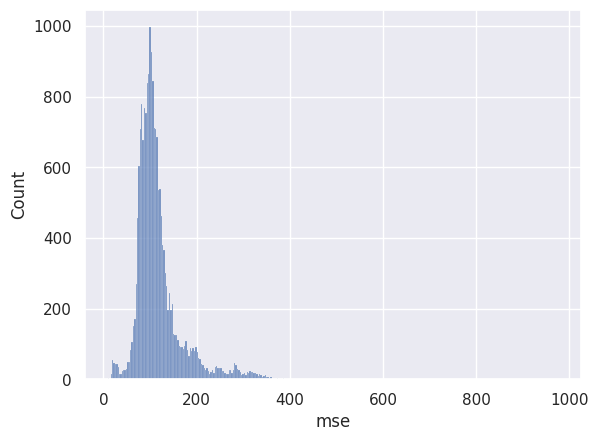

In [ ]:
sns.histplot(data=df, x="mse")
None

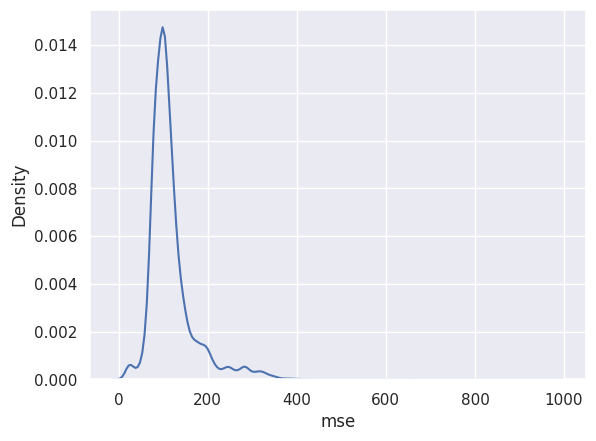

In [ ]:
sns.kdeplot(data=df, x="mse")
None

In [ ]:
## Let us exclude outliers

In [ ]:
mse_values = df['mse'].values ## could use .to_numpy() instead

In [ ]:
mse_values = sorted(mse_values)

In [ ]:
percent_idx = 0.999*len(mse_values)

In [ ]:
mse_values[int(percent_idx)+1]

430.471625448264

Remove instances of large values of MSE.

In [ ]:
df[df['mse'] > 344].index  ### 99.9% of mse values are below 343

Int64Index([  357,  2837,  2838,  2839,  2840,  2841,  2842,  2844,  2845,
             2846,  2847,  2850,  2852,  2853,  2884,  2890,  2891,  3435,
             3436,  3437,  3438,  3652,  3653,  3654,  3655,  5592,  6040,
             6042,  6043,  6044,  6045,  6046,  6048,  6049,  6050,  6054,
             6055,  6056,  7657,  7783,  9905, 10606, 10811, 11047, 11426,
            11475, 11522, 11562, 12103, 12285, 12356, 12811, 12849, 12865,
            13138, 13163, 13815, 13911, 14206, 14255, 14352, 14353, 14659,
            14660, 15466, 15573, 15652, 15728, 16089, 16110, 16131, 16178,
            16663, 16825, 17123, 18305, 19014, 19015],
           dtype='int64')

In [ ]:
df = df.drop(df[df['mse'] > 344].index)

In [ ]:
df = df.reset_index(drop = True)

In [ ]:
df

ld       w        r        f        p       q         s  \
0       7840.125  21.789   49.507  445.616  134.020  10.455  2941.820   
1       7840.158  21.761   49.384  444.789  133.767   9.141  2947.810   
2       7841.011  22.822   49.507  445.616  133.429  10.377  2972.090   
3       7841.175  22.739   49.507  444.797  104.280  11.535  2988.958   
4       7841.208  19.414   49.683  445.608  102.184   8.365  2993.816   
...          ...     ...      ...      ...      ...     ...       ...   
19150  14452.297  23.744   99.900  459.588  198.562  16.180  3925.787   
19151  14452.757  23.800   99.865  459.588  196.515  15.847  3932.894   
19152  14453.281  23.297  100.006  459.588  184.820  15.854  3931.763   
19153  14453.806  23.297   99.883  459.588  180.966  15.693  3928.572   
19154  14454.035  23.213  100.006  460.415  186.776  15.730  3916.737   

            dp         d         mse  
0      588.918  0.153799  104.097157  
1      594.914  0.153822  101.655735  
2      619.195  0.153121  108.413152  
3      636.053  0.119828  144.928438  
4      640.916  0.117148  138.773246  
...        ...       ...         ...  
19150  655.782  0.173732  115.004684  
19151  662.892  0.171967  115.718682  
19152  661.759  0.161633  122.998876  
19153  658.575  0.158348  124.625329  
19154  646.737  0.163179  119.913219  

[19155 rows x 10 columns]

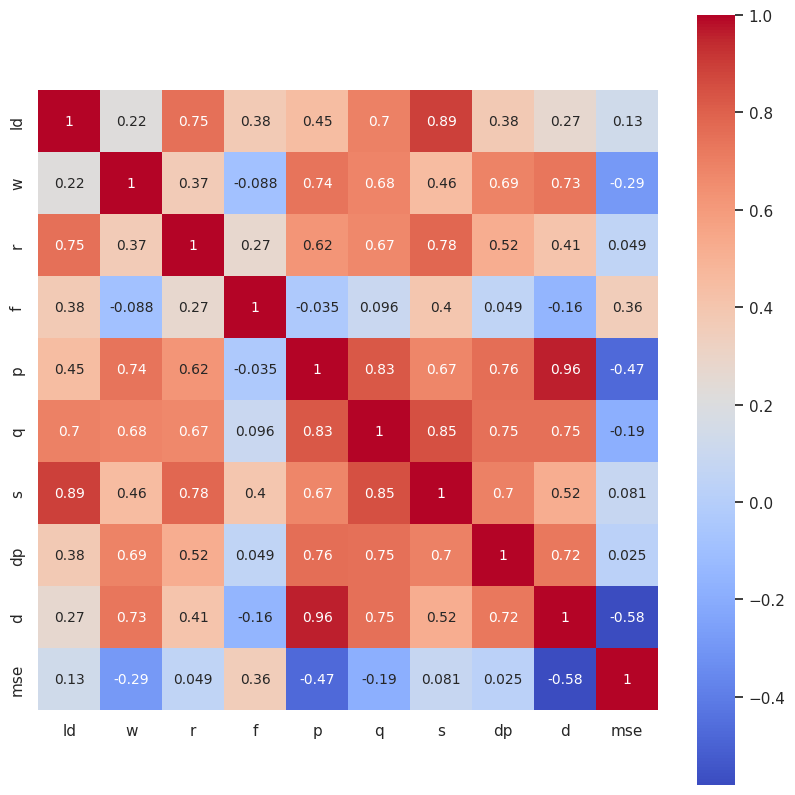

In [ ]:
fig, axs = plt.subplots(nrows=1, figsize=(10, 10))

sns.heatmap(df.corr(method = 'pearson'),  annot=True, square=True, cmap='coolwarm', annot_kws={'size': 10})
plt.show()

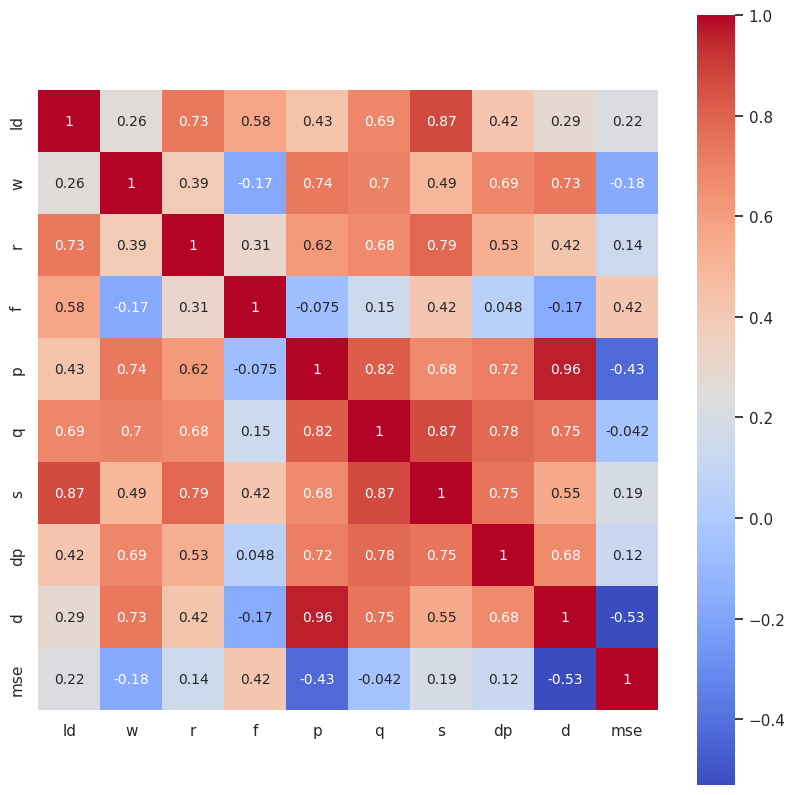

In [ ]:
fig, axs = plt.subplots(nrows=1, figsize=(10, 10))

sns.heatmap(df.corr(method = 'spearman'),  annot=True, square=True, cmap='coolwarm', annot_kws={'size': 10})
plt.show()

## Number of samples

In [ ]:
sample_num = df.shape[0];
df_small = df.iloc[0:sample_num,:]
df_small.shape

(19155, 10)

In [ ]:
labels = ['Well Length' , 'WOB', 'RPM', 'Flow', 'ROP', 'Torque', 'SPP', 'Differential Pressure', 'DOC', 'MSE']

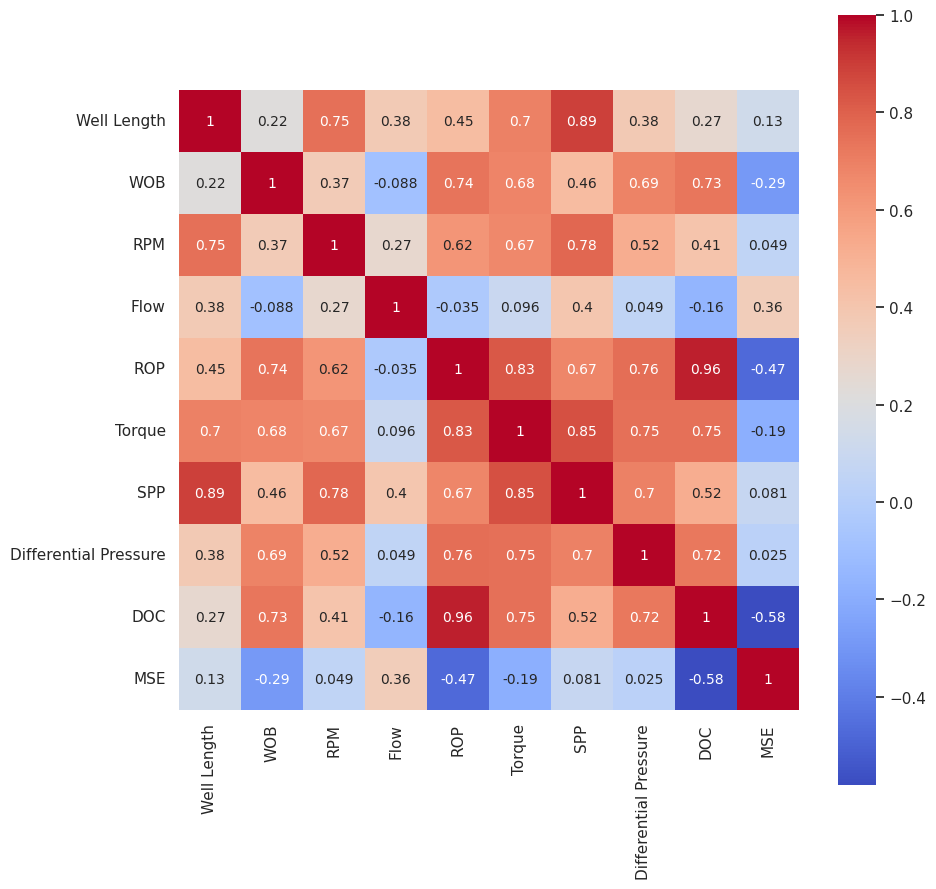

In [ ]:
fig, axs = plt.subplots(nrows=1, figsize=(10, 10))

sns.heatmap(df_small.corr(method = 'pearson'),  annot=True, square=True,
            xticklabels = labels, yticklabels = labels ,cmap='coolwarm', annot_kws={'size': 10})
plt.show()

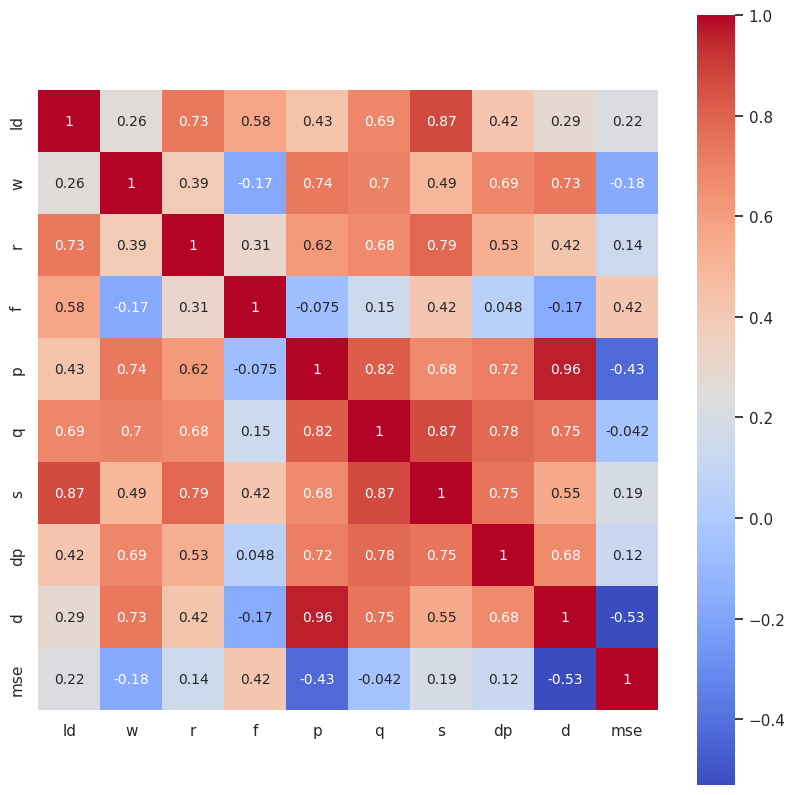

In [ ]:
fig, axs = plt.subplots(nrows=1, figsize=(10, 10))

sns.heatmap(df_small.corr(method = 'spearman'),  annot=True, square=True, cmap='coolwarm', annot_kws={'size': 10})
plt.show()

In [ ]:
# !pip install keras-tuner -q

In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

from tensorflow import keras
from tensorflow.keras import layers
# import keras_tuner

In [ ]:
df_small.describe()

ld             w             r             f             p  \
count  19155.000000  19155.000000  19155.000000  19155.000000  19155.000000   
mean   10753.888993     17.830146     63.065438    456.470790    126.148215   
std     1899.925569      6.301964     26.466027     14.803314     59.261227   
min     7840.125000      0.028000      8.547000    341.001000      9.992000   
25%     8981.595000     13.045000     39.580000    446.435000     73.733500   
50%    10487.697000     18.046000     69.537000    459.588000    132.457000   
75%    12325.493000     22.543000     85.689000    459.588000    178.840000   
max    14454.035000     39.415000    100.941000    494.797000    259.287000   

                  q             s            dp             d           mse  
count  19155.000000  19155.000000  19155.000000  19155.000000  19155.000000  
mean      10.563970   3196.845250    463.377889      0.129338    116.331391  
std        3.404714    399.044769    175.694139      0.053012     48.702092  
min        3.165000   1609.487000      0.391000      0.016858      9.258449  
25%        7.455000   2858.554000    325.126500      0.077811     87.877313  
50%       10.411000   3159.624000    525.258000      0.143839    104.362871  
75%       13.359000   3543.539000    610.678000      0.174726    127.454413  
max       20.050000   3976.753000    783.317000      0.300742    343.661913

In [ ]:
df_small.max() - df_small.min() ## range

ld     6613.910000
w        39.387000
r        92.394000
f       153.796000
p       249.295000
q        16.885000
s      2367.266000
dp      782.926000
d         0.283884
mse     334.403464
dtype: float64

In [ ]:
X = df_small.loc[:,['ld', 'w', 'r', 'f', 'dp']]  ## well length (ld), WOB (w), RPM (r), Flow (f)
IMP = df_small.loc[:,['q', 's', 'd']]  ## should contain Torque (q), SPP (s), DOC (d)
PEF = df_small.loc[:,['p', 'mse']]  ## should contain ROP (p) and MSE (mse)

Random split

In [ ]:
X_train_pd, X_test_pd, IMP_train, IMP_test = train_test_split(X, IMP, test_size = 0.2, random_state = SEED)

In [ ]:
X_train_PEF, X_test_PEF, PEF_train, PEF_test = train_test_split(X, PEF, test_size = 0.2, random_state = SEED)

In [ ]:
all([a == b for a, b in zip(X_train_pd, X_train_PEF)]) ## X_train and X_train_PEF are the same (b/c we used same random state)

True

In [ ]:
dp_train = np.array(X_train_pd.iloc[:,-1]) ## _pd is a pandas dataframe that we are converting to an array
X_train = np.array(X_train_pd.iloc[:,:-1])
dp_test = np.array(X_test_pd.iloc[:,-1])
X_test = np.array(X_test_pd.iloc[:,:-1])

In [ ]:
X_train.shape

(15324, 4)

In [ ]:
# ROP =
def ROP(DOC, RPM, Flow):
  K = 74 * (1/ 264.172); ## rev / m**3 * m**3 / gal = rev / gal
  RPMM = K * Flow;
  return DOC*(RPM+ RPMM) * 5 ## converting inch/min to ft/hr

In [ ]:
# MSE =
def MSE(ROP, Torque, WOB, RPM, Flow, dp):
  A_B = np.pi * (8.5/2)**2; ## np.pi * rad^2 , diameter of the bit is 8.5“ (inches)
  T_max = 15.02;# ft-kilo lb #2.074; # meter-ton
  dp_max = 700; # psi   # 49.2; # kg/cm**2
  K = 74 * (1/ 264.172); ## rev / m**3 * m**3 / gal = rev / gal
  TM = T_max * dp / dp_max;
  RPMM = K * Flow;
  return (WOB*ROP+ 60*2*np.pi *RPM*Torque + 60*2*np.pi*RPMM*TM) / (A_B*ROP)

In [ ]:
# loss_fct = keras.metrics.RootMeanSquaredError()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# mean_squared_error(y_test, y_pred_RF, squared = False, multioutput = 'raw_values')

In [ ]:
def loss_fct(y_test, y_pred):
  return mean_squared_error(y_test, y_pred, squared = False, multioutput = 'raw_values')[0]

# IMP approach


In [ ]:
y_train = IMP_train.values[:,[0,2]]
y_test = IMP_test.values[:,[0,2]]
# y_train = PEF_train.values
# y_test = PEF_test.values

Doing multiple ML algorithms in a loop

In [ ]:
# help(xgb.XGBRegressor)

In [ ]:
estimators = [('rf', RandomForestRegressor(random_state=SEED)),
#  ('ada', AdaBoostRegressor(random_state=SEED)),
#  ('gb', HistGradientBoostingRegressor(random_state=SEED)),
  ('xgb', xgb.XGBRegressor(random_state=SEED)),
  ('et', ExtraTreesRegressor(random_state=SEED))]

In [ ]:
# parameters = {'rf': {'n_estimators': [250,500], 'max_depth':[9,12,15]},
#               # 'ada':{'n_estimators': [100,250,500], 'learning_rate': [1, 0.5, 0.1]},
#               # 'gb':{'max_iter':[100, 150, 200], 'learning_rate': [1, 0.5, 0.1]},
#               'xgb': {'max_depth':[9,12,15], 'learning_rate': [0.3, 0.1, 0.05] },
#               'et' :{'n_estimators': [250,500,750], 'max_depth':[9,12,15]} }

In [ ]:
parameters = {'rf': {'n_estimators': [250], 'max_depth':[19,21,23]},
              # 'ada':{'n_estimators': [100,250,500], 'learning_rate': [1, 0.5, 0.1]},
              # 'gb':{'max_iter':[100, 150, 200], 'learning_rate': [1, 0.5, 0.1]},
              'xgb': {'learning_rate': [0.1], 'max_depth':[17] },
              'et' :{'n_estimators': [250], 'max_depth':[19,21,23]} }

In [ ]:
hypertune = False  ### True will rerun hyperparameter search
if hypertune:
  estimators_para_imp = [0]*len(estimators)
  for i, (name, clf) in enumerate(estimators):
    # clf_search = RandomizedSearchCV(clf, parameters[name], cv = 5).fit(X_train, y_train)
    clf_search = GridSearchCV(clf, parameters[name], cv = 5).fit(X_train, y_train)
    estimators_para_imp[i] = (name, clf_search.best_estimator_)
else:
  estimators_para_imp = [('rf', RandomForestRegressor(max_depth=23, n_estimators=250, random_state=0)),
       ('xgb', XGBRegressor(learning_rate=0.1,max_depth=17, n_estimators=100, random_state=0)),
              ('et', ExtraTreesRegressor(max_depth=21, n_estimators=250, random_state=0))]
  # estimators_para_imp = [('rf', RandomForestRegressor(max_depth=13, n_estimators=150, random_state=0)),
  #      ('xgb', XGBRegressor(learning_rate=0.1,max_depth=7, n_estimators=100, random_state=0)),
  #             ('et', ExtraTreesRegressor(max_depth=11, n_estimators=150, random_state=0))]
  for (name, clf) in estimators_para_imp:
    clf.fit(X_train, y_train)
print(estimators_para_imp)

[('rf', RandomForestRegressor(max_depth=23, n_estimators=250, random_state=0)), ('xgb', XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=17, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=0, ...)), ('et', ExtraTreesRegressor(max_depth=21, n_estimators=250, random_state=0))]


In [ ]:
# #### run this cell to avoid rerunning hyperparameter search
# estimators_para_imp = [('rf', RandomForestRegressor(max_depth=12, n_estimators=250, random_state=0)),
#  ('xgb',XGBRegressor(learning_rate=0.1, max_depth=12, n_estimators=100, random_state=0)),
#  ('et', ExtraTreesRegressor(max_depth=12, n_estimators=500, random_state=0))]
# for (name, clf) in estimators_para_imp:
#   clf.fit(X_train, y_train)

In [ ]:
well_length_test_idx = np.argsort(X_test[:,0])

rf loss: 17.307329141827328, Nloss: 0.051854729051894644


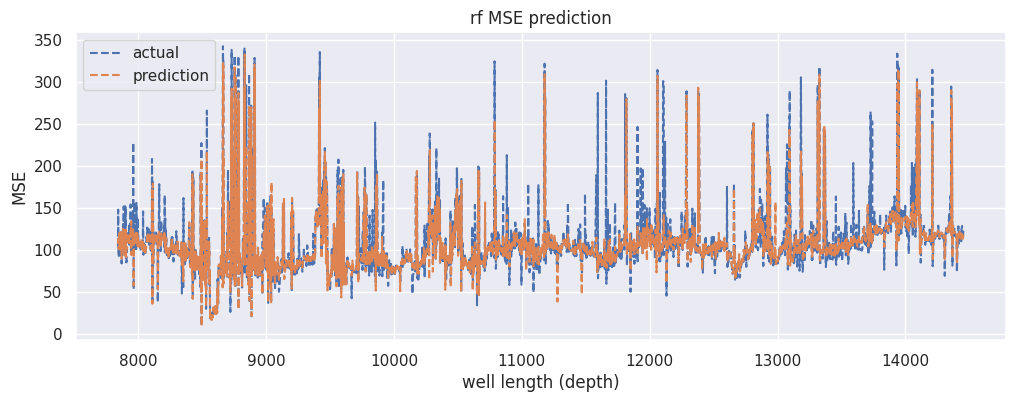

xgb loss: 15.13363986252561, Nloss: 0.04534210843333871


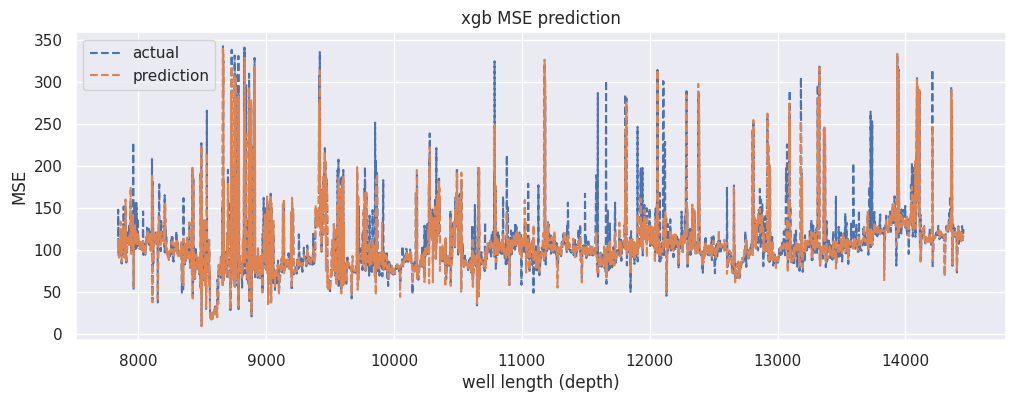

et loss: 16.481140575691192, Nloss: 0.049379374022144554


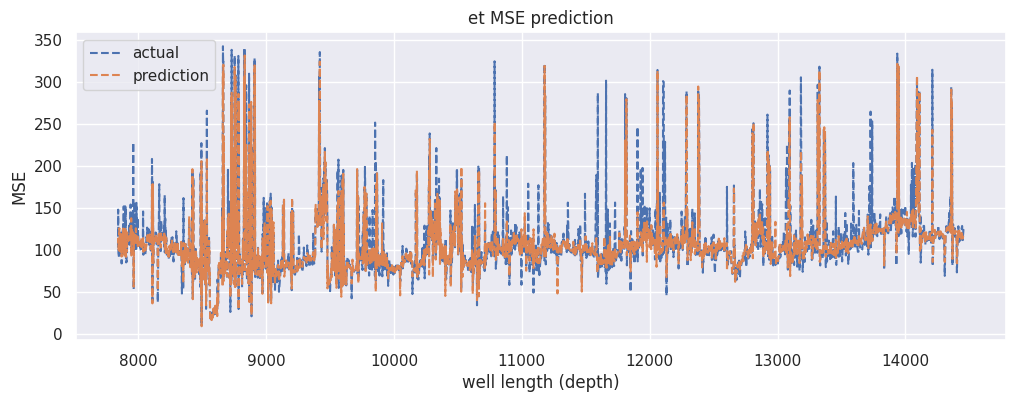

In [ ]:
for (name, clf) in estimators_para_imp:
  y_pred_clf = clf.predict(X_test)
  # print(f'{name} with {mean_squared_error(y_test, y_pred_clf, squared = False, multioutput = "raw_values")}')
  ROP_clf = ROP(y_pred_clf[:,-1], X_test[:,2], X_test[:,3])
  MSE_clf = MSE(ROP_clf, y_pred_clf[:,0], X_test[:,1], X_test[:,2], X_test[:,3], dp_test[:])
  print(f'{name} loss: {loss_fct(PEF_test.values[:,1], MSE_clf)}, Nloss: {loss_fct(PEF_test.values[:,1], MSE_clf) / (np.max(PEF_test.values[:,1]) - np.min(PEF_test.values[:,1]) )}') ## MSE
  plt.figure(figsize=(12,4))
  plt.plot(X_test[:,0][well_length_test_idx], PEF_test.values[:,1][well_length_test_idx],'--', label = 'actual')
  plt.plot(X_test[:,0][well_length_test_idx], MSE_clf[well_length_test_idx],'--', label = 'prediction')
  plt.xlabel('well length (depth)')
  plt.ylabel('MSE')
  plt.title(f'{name} MSE prediction')
  plt.legend()
  plt.show()

rf loss: 14.214681561985612, Nloss: 0.05925326936971122


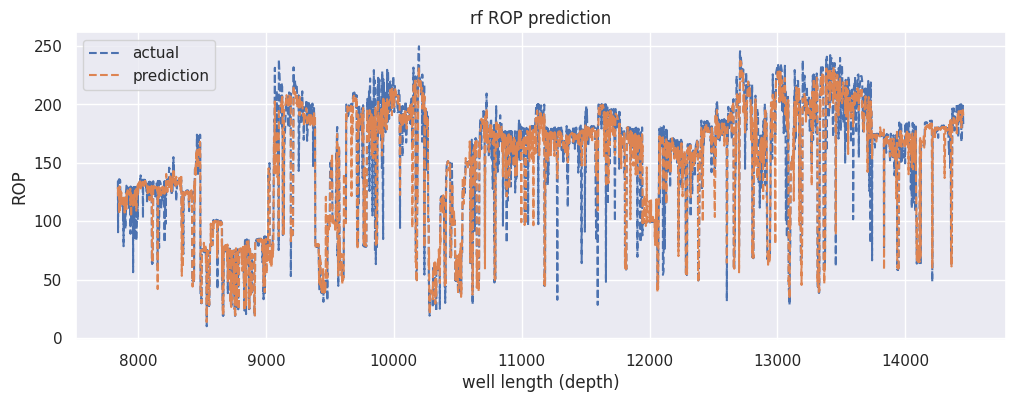

xgb loss: 12.422348464922448, Nloss: 0.05178200838244099


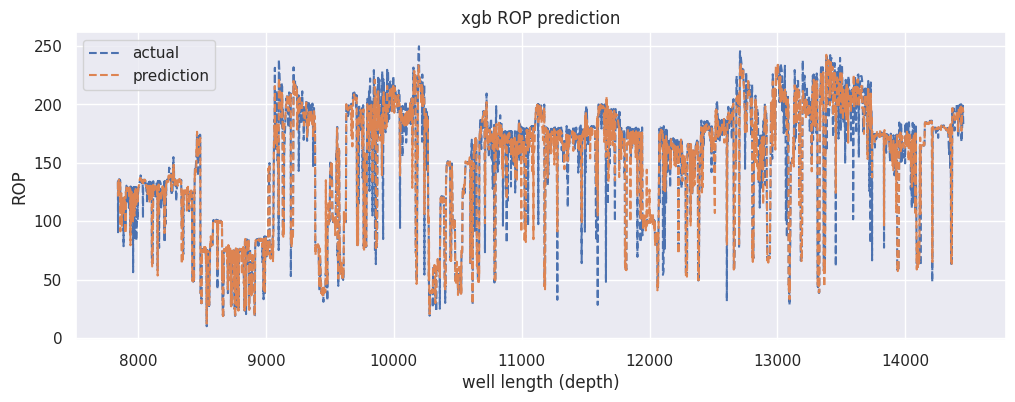

et loss: 13.856807646884098, Nloss: 0.05776148783387911


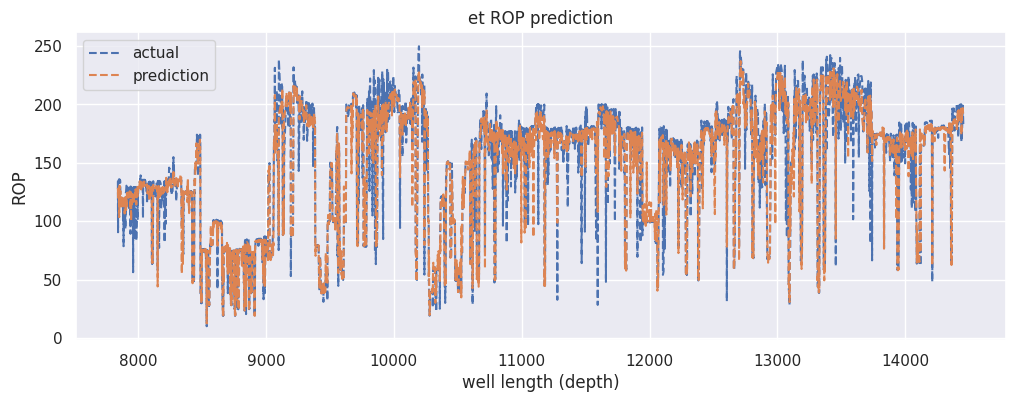

In [ ]:
for (name, clf) in estimators_para_imp:
  y_pred_clf = clf.predict(X_test)
  # print(f'{name} with {mean_squared_error(y_test, y_pred_clf, squared = False, multioutput = "raw_values")}')
  ROP_clf = ROP(y_pred_clf[:,-1], X_test[:,2], X_test[:,3])
  MSE_clf = MSE(ROP_clf, y_pred_clf[:,0], X_test[:,1], X_test[:,2], X_test[:,3], dp_test[:])
  print(f'{name} loss: {loss_fct(PEF_test.values[:,0], ROP_clf)}, Nloss: {loss_fct(PEF_test.values[:,0], ROP_clf) / (np.max(PEF_test.values[:,0]) - np.min(PEF_test.values[:,0]) )}') ## ROP error
  plt.figure(figsize=(12,4))
  plt.plot(X_test[:,0][well_length_test_idx], PEF_test.values[:,0][well_length_test_idx],'--', label = 'actual')
  plt.plot(X_test[:,0][well_length_test_idx], ROP_clf[well_length_test_idx],'--', label = 'prediction')
  plt.xlabel('well length (depth)')
  plt.ylabel('ROP')
  plt.title(f'{name} ROP prediction')
  plt.legend()
  plt.show()

In [ ]:
feature_names = np.array(['well length', 'wob', 'rpm', 'flow'])

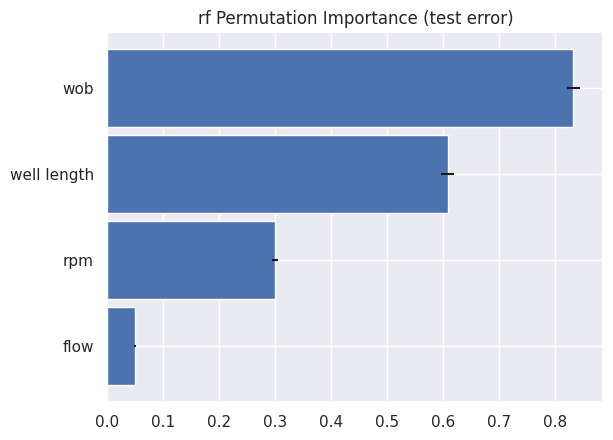

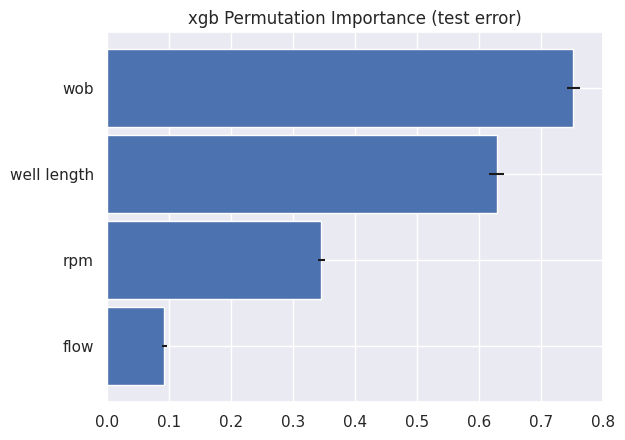

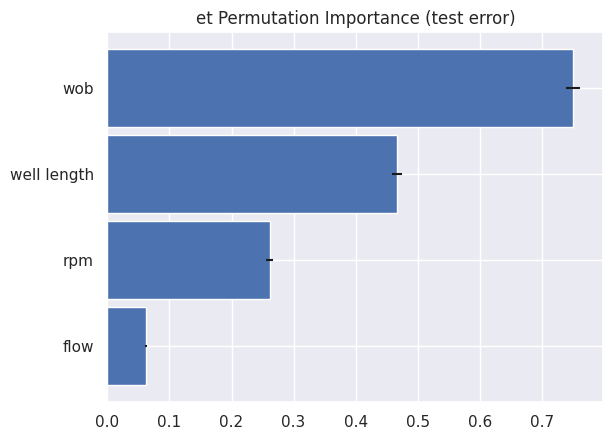

In [ ]:
for (name, clf) in estimators_para_imp:
  importance_stacking = permutation_importance(estimator = clf, X = X_test, y = y_test,
                                             n_repeats = 20, random_state= SEED)
  sorted_idx = np.argsort(importance_stacking.importances_mean)
  plt.barh(y = np.linspace(0, 1,4) , width = importance_stacking.importances_mean[sorted_idx], height = 0.3,
         tick_label = feature_names[sorted_idx],
         xerr = importance_stacking.importances_std[sorted_idx])
  plt.title(f'{name} Permutation Importance (test error)')
  plt.show()

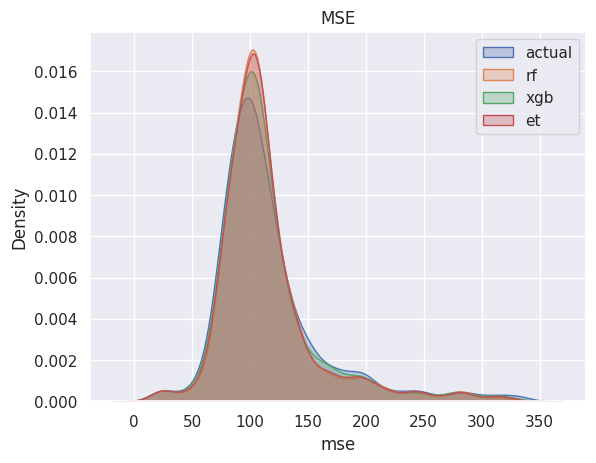

In [ ]:
sns.kdeplot(data = PEF_test, x = 'mse', label = 'actual', fill = True, alpha = 0.3)
for (name, clf) in estimators_para_imp:
  y_pred_clf = clf.predict(X_test)
  # print(f'{name} with {mean_squared_error(y_test, y_pred_clf, squared = False, multioutput = "raw_values")}')
  ROP_clf = ROP(y_pred_clf[:,-1], X_test[:,2], X_test[:,3])
  MSE_clf = MSE(ROP_clf, y_pred_clf[:,0], X_test[:,1], X_test[:,2], X_test[:,3], dp_test[:])
  sns.kdeplot(MSE_clf, label = f'{name}', fill = True, alpha = 0.3)
plt.title('MSE')
plt.legend()
plt.show()
None

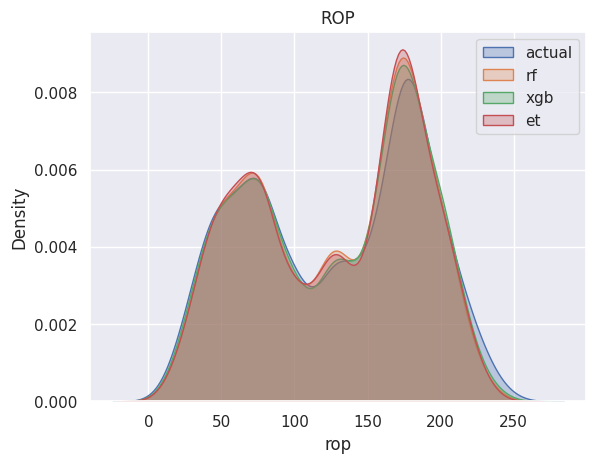

In [ ]:
sns.kdeplot(data = PEF_test, x = 'p', label = 'actual', fill = True, alpha = 0.3)
for (name, clf) in estimators_para_imp:
  y_pred_clf = clf.predict(X_test)
  # print(f'{name} with {mean_squared_error(y_test, y_pred_clf, squared = False, multioutput = "raw_values")}')
  ROP_clf = ROP(y_pred_clf[:,-1], X_test[:,2], X_test[:,3])
  sns.kdeplot(ROP_clf, label = f'{name}', fill = True, alpha = 0.3)
plt.title('ROP')
plt.xlabel('rop')
plt.legend()
plt.show()
None

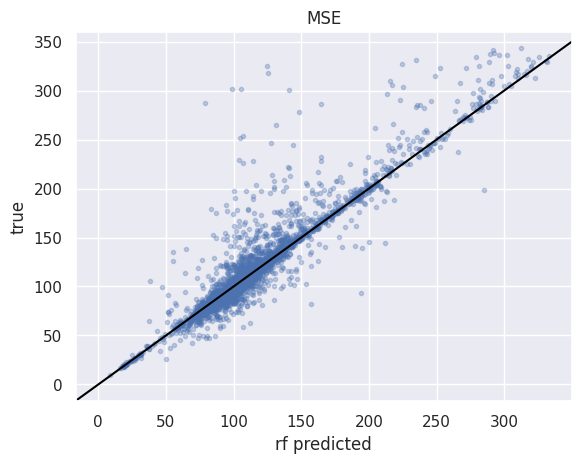

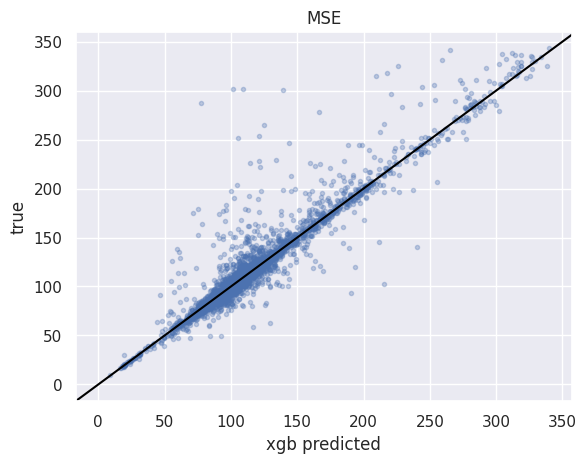

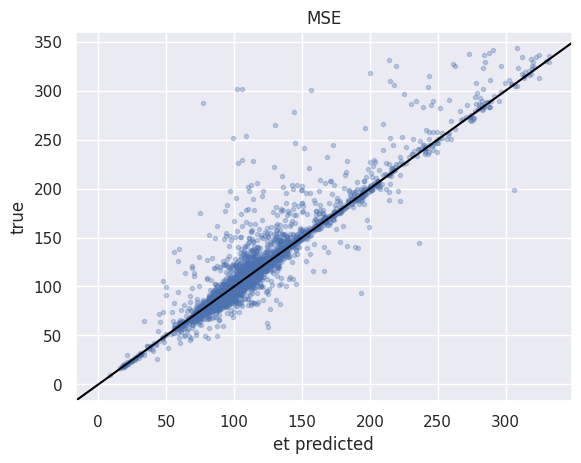

In [ ]:
for (name, clf) in estimators_para_imp:
  y_pred_clf = clf.predict(X_test)
  # print(f'{name} with {mean_squared_error(y_test, y_pred_clf, squared = False, multioutput = "raw_values")}')
  ROP_clf = ROP(y_pred_clf[:,-1], X_test[:,2], X_test[:,3])
  MSE_clf = MSE(ROP_clf, y_pred_clf[:,0], X_test[:,1], X_test[:,2], X_test[:,3], dp_test[:])
  plt.plot(MSE_clf, PEF_test.values[:,1], '.', alpha = 0.3)
  plt.axline((0, 0), slope=1, linestyle = '-', color = 'black')
  plt.title('MSE')
  plt.xlabel(f'{name} predicted')
  plt.ylabel('true')
  # plt.xlim([0,375])
  # plt.ylim([0,400])
  plt.show()

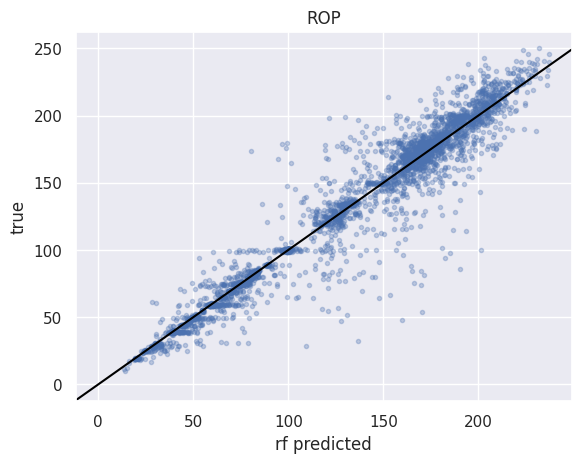

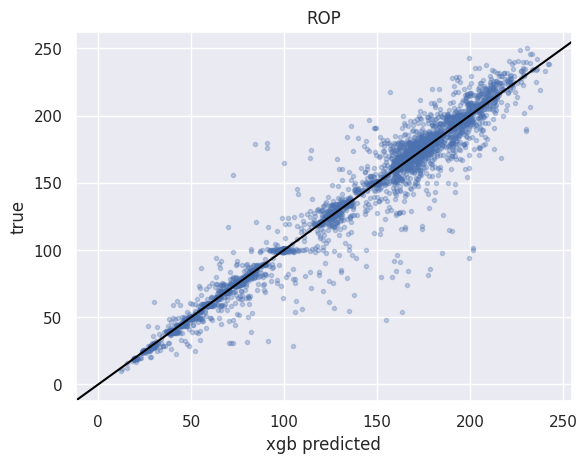

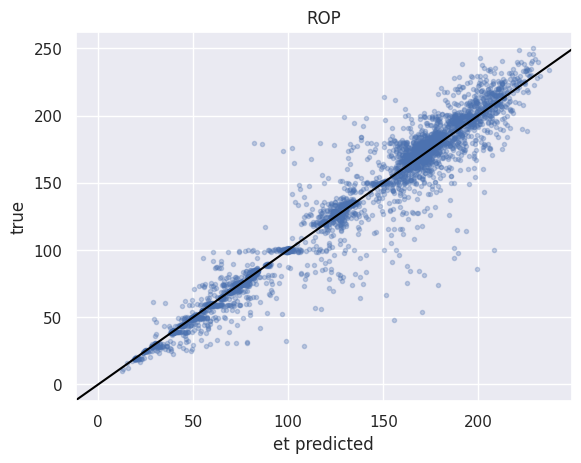

In [ ]:
for (name, clf) in estimators_para_imp:
  y_pred_clf = clf.predict(X_test)
  # print(f'{name} with {mean_squared_error(y_test, y_pred_clf, squared = False, multioutput = "raw_values")}')
  ROP_clf = ROP(y_pred_clf[:,-1], X_test[:,2], X_test[:,3])
  # MSE_clf = MSE(ROP_clf, y_pred_clf[:,0], X_test[:,1], X_test[:,2], X_test[:,3], dp_test[:])
  plt.plot(ROP_clf, PEF_test.values[:,0], '.', alpha = 0.3)
  plt.axline((0, 0), slope=1, linestyle = '-', color = 'black')
  # plt.plot(ROP_value, ROP_value, 'k-')
  plt.title('ROP')
  plt.xlabel(f'{name} predicted')
  plt.ylabel('true')
  plt.show()

# PEF approach

In [ ]:
# y_train = IMP_train.values[:,[0,2]]
# y_test = IMP_test.values[:,[0,2]]
y_train = PEF_train.values
y_test = PEF_test.values

Doing multiple ML algorithms in a loop

In [ ]:
# help(xgb.XGBRegressor)

In [ ]:
estimators = [('rf', RandomForestRegressor(random_state=SEED)),
#  ('ada', AdaBoostRegressor(random_state=SEED)),
#  ('gb', HistGradientBoostingRegressor(random_state=SEED)),
  ('xgb', xgb.XGBRegressor(random_state=SEED)),
  ('et', ExtraTreesRegressor(random_state=SEED))]

In [ ]:
parameters = {'rf': {'n_estimators': [250,500], 'max_depth':[9,12,15]},
              # 'ada':{'n_estimators': [100,250,500], 'learning_rate': [1, 0.5, 0.1]},
              # 'gb':{'max_iter':[100, 150, 200], 'learning_rate': [1, 0.5, 0.1]},
              'xgb': {'max_depth':[9,12,15], 'learning_rate': [0.3, 0.1, 0.05] },
              'et' :{'n_estimators': [250,500,750], 'max_depth':[9,12,15]} }

In [ ]:
hypertune = False  ### True will rerun hyperparameter search
if hypertune:
  estimators_para_pef = [0]*len(estimators)
  for i, (name, clf) in enumerate(estimators):
    clf_search = RandomizedSearchCV(clf, parameters[name], cv = 5).fit(X_train, y_train)
    estimators_para_pef[i] = (name, clf_search.best_estimator_)
else:
  estimators_para_pef = [('rf', RandomForestRegressor(max_depth=23, n_estimators=250, random_state=0)),
       ('xgb', XGBRegressor(learning_rate=0.1,max_depth=17, n_estimators=100, random_state=0)),
              ('et', ExtraTreesRegressor(max_depth=21, n_estimators=250, random_state=0))]
  # estimators_para_pef = [('rf', RandomForestRegressor(max_depth=13, n_estimators=150, random_state=0)),
  #      ('xgb', XGBRegressor(learning_rate=0.1,max_depth=7, n_estimators=100, random_state=0)),
  #             ('et', ExtraTreesRegressor(max_depth=11, n_estimators=150, random_state=0))]
  for (name, clf) in estimators_para_pef:
    clf.fit(X_train, y_train)
print(estimators_para_pef)

[('rf', RandomForestRegressor(max_depth=23, n_estimators=250, random_state=0)), ('xgb', XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=17, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=0, ...)), ('et', ExtraTreesRegressor(max_depth=21, n_estimators=250, random_state=0))]


In [ ]:
# estimators_para_pef = [0]*len(estimators)
# for i, (name, clf) in enumerate(estimators):
#   clf_search = RandomizedSearchCV(clf, parameters[name], cv = 5).fit(X_train, y_train)
#   estimators_para_pef[i] = (name, clf_search.best_estimator_)

In [ ]:
# estimators_para_pef

In [ ]:
# #### run this cell to avoid rerunning hyperparameter search
# estimators_para_pef = [('rf', RandomForestRegressor(max_depth=12, n_estimators=250, random_state=0)),
#  ('xgb',XGBRegressor(learning_rate=0.1, max_depth=12, n_estimators=100, random_state=0)),
#  ('et', ExtraTreesRegressor(max_depth=12, n_estimators=500, random_state=0))]
# for (name, clf) in estimators_para_pef:
#   clf.fit(X_train, y_train)

In [ ]:
well_length_test_idx = np.argsort(X_test[:,0])

rf loss: 20.683347985723916, Nloss: 0.06196966596617955


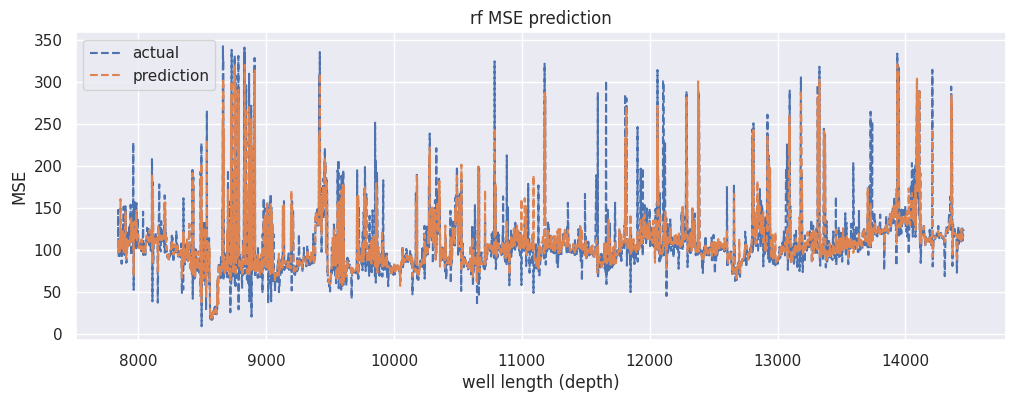

xgb loss: 19.868487883866862, Nloss: 0.05952825230548485


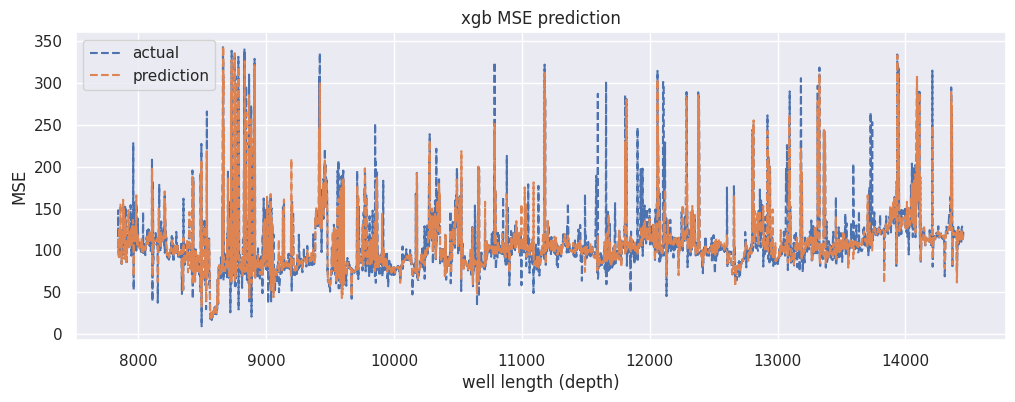

et loss: 20.139004256286942, Nloss: 0.06033875016341509


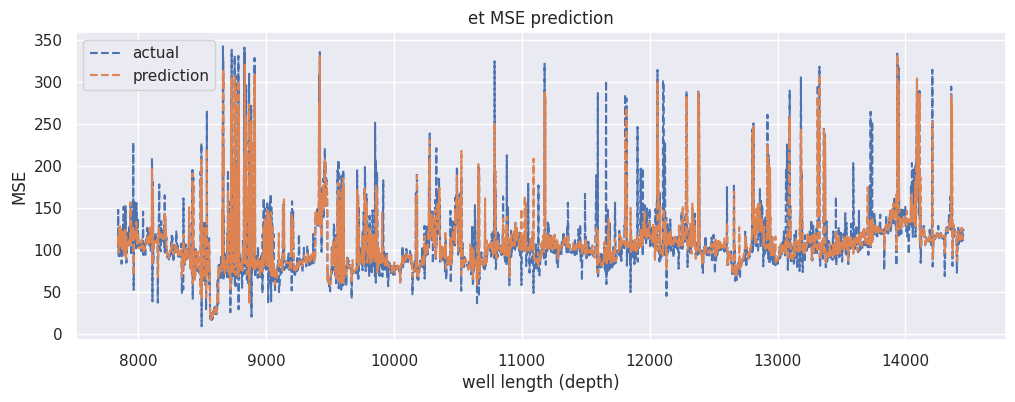

In [ ]:
for (name, clf) in estimators_para_pef:
  y_pred_clf = clf.predict(X_test)
  # print(f'{name} with {mean_squared_error(y_test, y_pred_clf, squared = False, multioutput = "raw_values")}')
  ROP_clf = y_pred_clf[:,0]
  MSE_clf = y_pred_clf[:,1]
  print(f'{name} loss: {loss_fct(PEF_test.values[:,1], MSE_clf)}, Nloss: {loss_fct(PEF_test.values[:,1], MSE_clf) / (np.max(PEF_test.values[:,1]) - np.min(PEF_test.values[:,1]) )}') ## MSE
  plt.figure(figsize=(12,4))
  plt.plot(X_test[:,0][well_length_test_idx], PEF_test.values[:,1][well_length_test_idx],'--', label = 'actual')
  plt.plot(X_test[:,0][well_length_test_idx], MSE_clf[well_length_test_idx],'--', label = 'prediction')
  plt.xlabel('well length (depth)')
  plt.ylabel('MSE')
  plt.title(f'{name} MSE prediction')
  plt.legend()
  plt.show()

rf loss: 12.561593645801192, Nloss: 0.05236244574046858


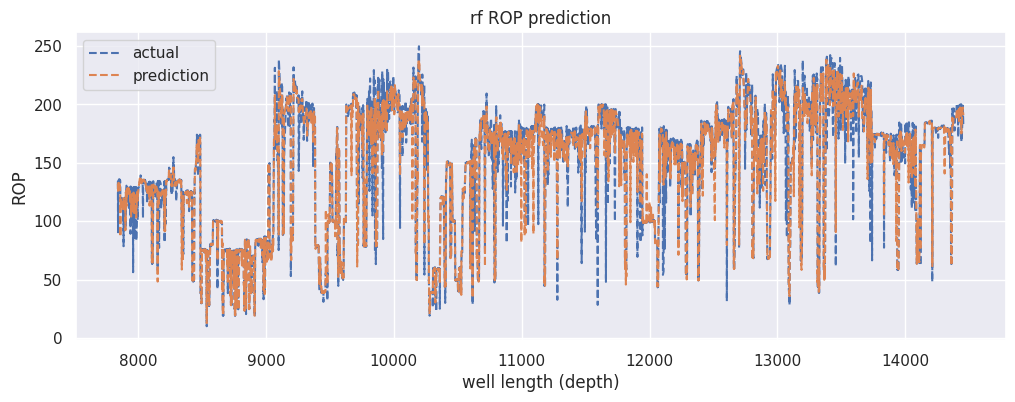

xgb loss: 12.476371982465654, Nloss: 0.05200720301823555


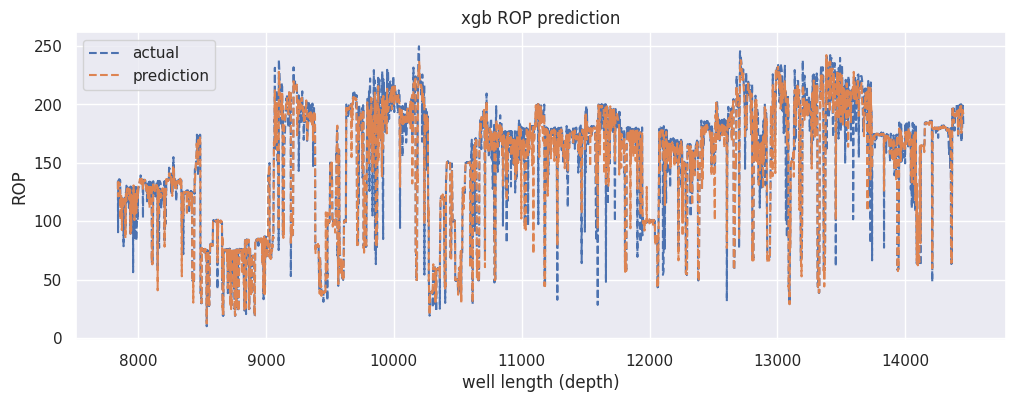

et loss: 12.623255008428215, Nloss: 0.052619478394595236


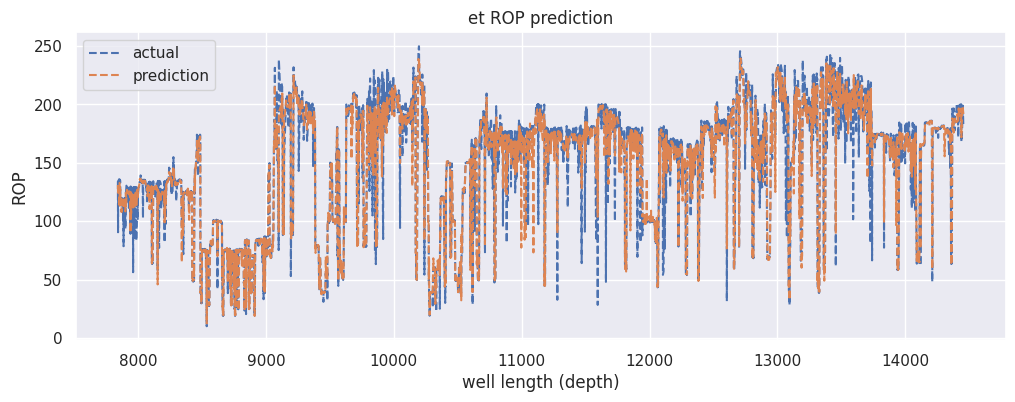

In [ ]:
for (name, clf) in estimators_para_pef:
  y_pred_clf = clf.predict(X_test)
  # print(f'{name} with {mean_squared_error(y_test, y_pred_clf, squared = False, multioutput = "raw_values")}')
  ROP_clf = y_pred_clf[:,0]
  MSE_clf = y_pred_clf[:,1]
  print(f'{name} loss: {loss_fct(PEF_test.values[:,0], ROP_clf)}, Nloss: {loss_fct(PEF_test.values[:,0], ROP_clf) / (np.max(PEF_test.values[:,0]) - np.min(PEF_test.values[:,0]) )}') ## ROP error
  plt.figure(figsize=(12,4))
  plt.plot(X_test[:,0][well_length_test_idx], PEF_test.values[:,0][well_length_test_idx],'--', label = 'actual')
  plt.plot(X_test[:,0][well_length_test_idx], ROP_clf[well_length_test_idx],'--', label = 'prediction')
  plt.xlabel('well length (depth)')
  plt.ylabel('ROP')
  plt.title(f'{name} ROP prediction')
  plt.legend()
  plt.show()

In [ ]:
feature_names = np.array(['well length', 'wob', 'rpm', 'flow'])

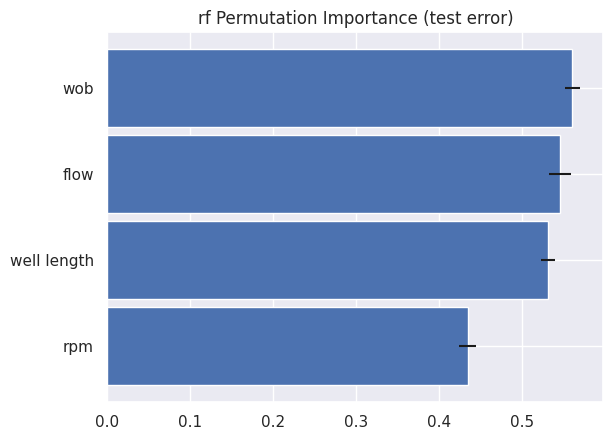

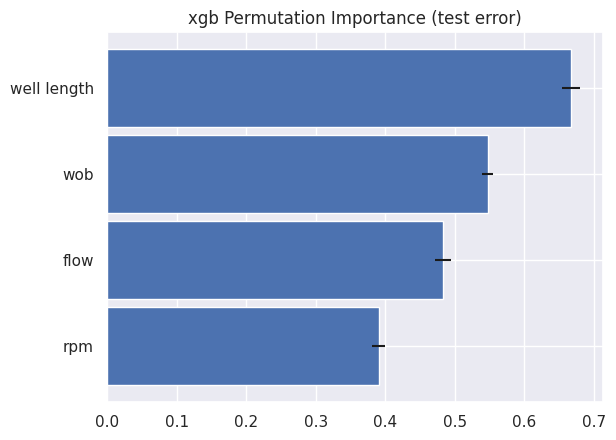

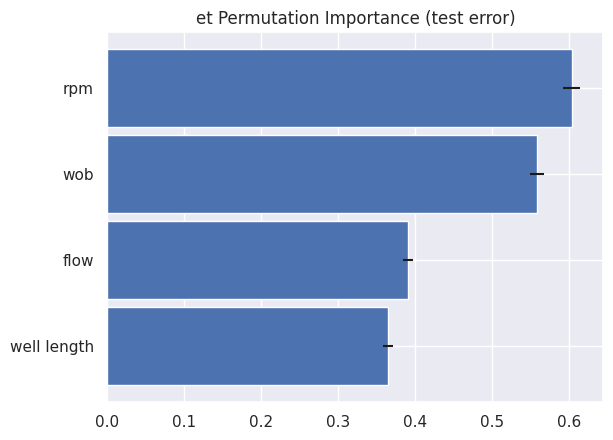

In [ ]:
for (name, clf) in estimators_para_pef:
  importance_stacking = permutation_importance(estimator = clf, X = X_test, y = y_test,
                                             n_repeats = 20, random_state= SEED)
  sorted_idx = np.argsort(importance_stacking.importances_mean)
  plt.barh(y = np.linspace(0, 1,4) , width = importance_stacking.importances_mean[sorted_idx], height = 0.3,
         tick_label = feature_names[sorted_idx],
         xerr = importance_stacking.importances_std[sorted_idx])
  plt.title(f'{name} Permutation Importance (test error)')
  plt.show()

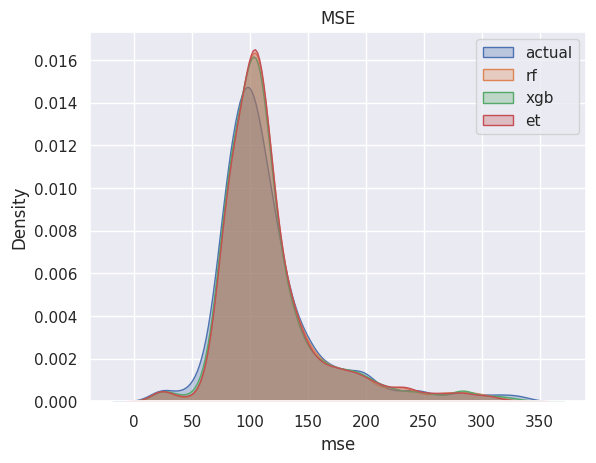

In [ ]:
sns.kdeplot(data = PEF_test, x = 'mse', label = 'actual', fill = True, alpha = 0.3)
for (name, clf) in estimators_para_pef:
  y_pred_clf = clf.predict(X_test)
  # print(f'{name} with {mean_squared_error(y_test, y_pred_clf, squared = False, multioutput = "raw_values")}')
  ROP_clf = y_pred_clf[:,0]
  MSE_clf = y_pred_clf[:,1]
  sns.kdeplot(MSE_clf, label = f'{name}', fill = True, alpha = 0.3)
plt.title('MSE')
plt.legend()
plt.show()
None

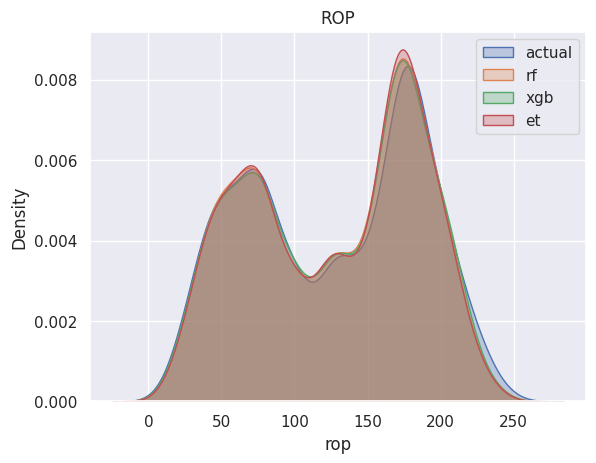

In [ ]:
sns.kdeplot(data = PEF_test, x = 'p', label = 'actual', fill = True, alpha = 0.3)
for (name, clf) in estimators_para_pef:
  y_pred_clf = clf.predict(X_test)
  # print(f'{name} with {mean_squared_error(y_test, y_pred_clf, squared = False, multioutput = "raw_values")}')
  ROP_clf = y_pred_clf[:,0]
  sns.kdeplot(ROP_clf, label = f'{name}', fill = True, alpha = 0.3)
plt.title('ROP')
plt.xlabel('rop')
plt.legend()
plt.show()
None

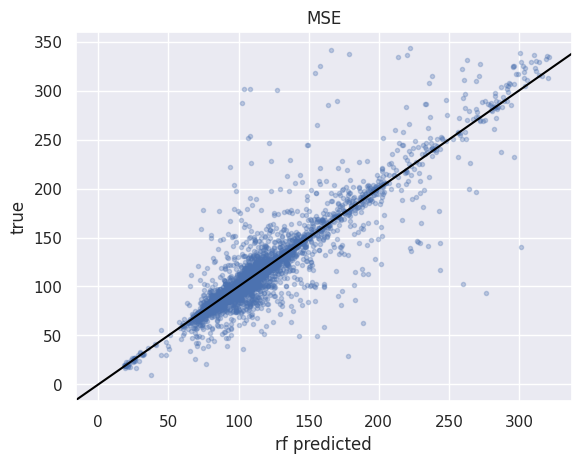

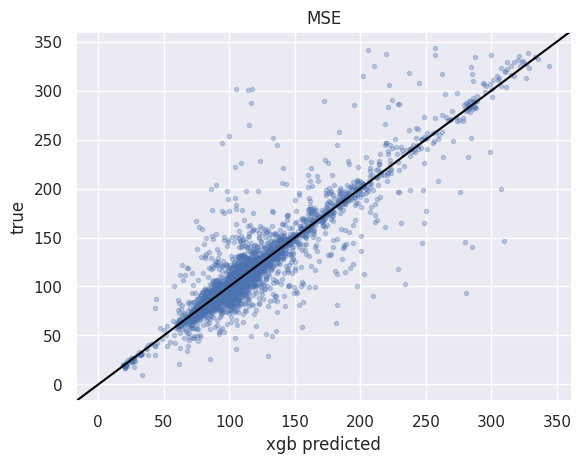

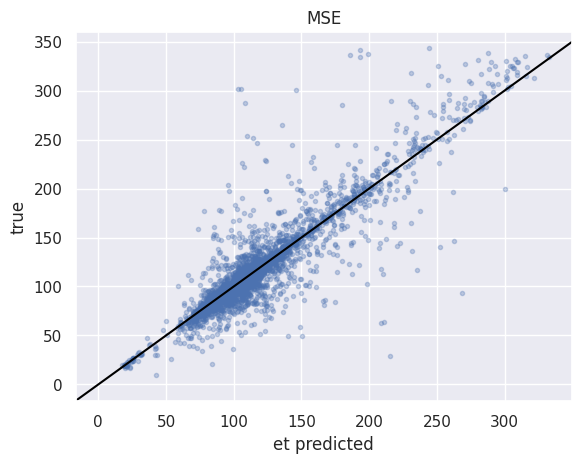

In [ ]:
for (name, clf) in estimators_para_pef:
  y_pred_clf = clf.predict(X_test)
  # print(f'{name} with {mean_squared_error(y_test, y_pred_clf, squared = False, multioutput = "raw_values")}')
  ROP_clf = y_pred_clf[:,0]
  MSE_clf = y_pred_clf[:,1]
  plt.plot(MSE_clf, PEF_test.values[:,1], '.', alpha = 0.3)
  plt.axline((0, 0), slope=1, linestyle = '-', color = 'black')
  plt.title('MSE')
  plt.xlabel(f'{name} predicted')
  plt.ylabel('true')
  # plt.xlim([0,375])
  # plt.ylim([0,400])
  plt.show()

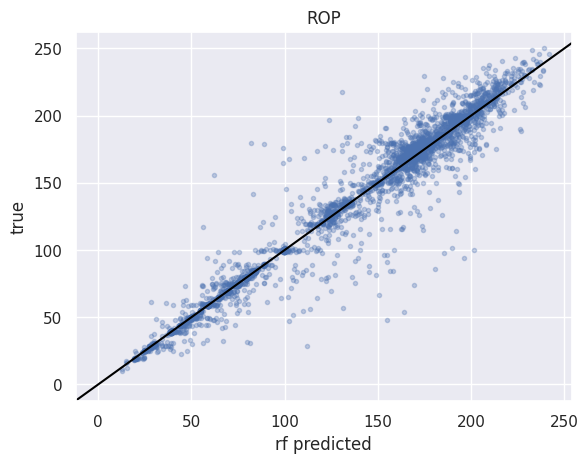

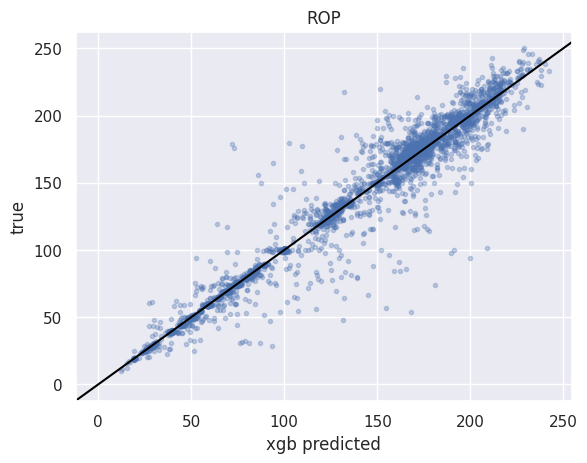

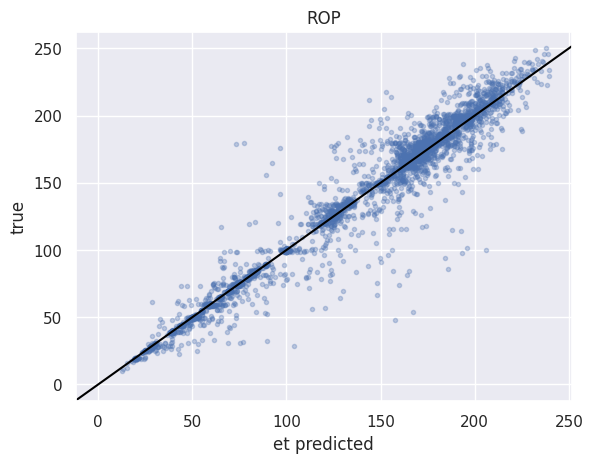

In [ ]:
for (name, clf) in estimators_para_pef:
  y_pred_clf = clf.predict(X_test)
  # print(f'{name} with {mean_squared_error(y_test, y_pred_clf, squared = False, multioutput = "raw_values")}')
  ROP_clf = y_pred_clf[:,0]
  plt.plot(ROP_clf, PEF_test.values[:,0], '.', alpha = 0.3)
  plt.axline((0, 0), slope=1, linestyle = '-', color = 'black')
  # plt.plot(ROP_value, ROP_value, 'k-')
  plt.title('ROP')
  plt.xlabel(f'{name} predicted')
  plt.ylabel('true')
  plt.show()

# Comparing distribution plots

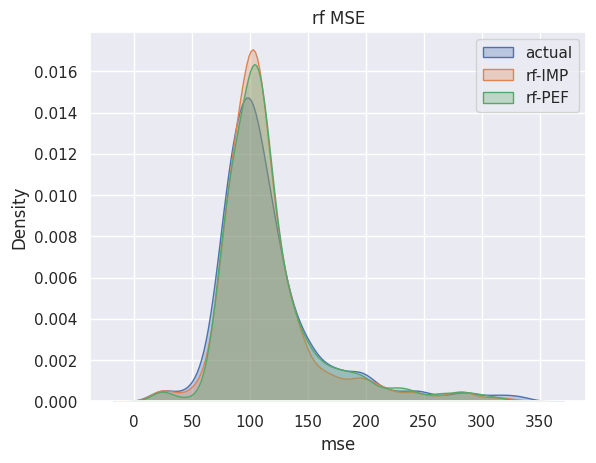

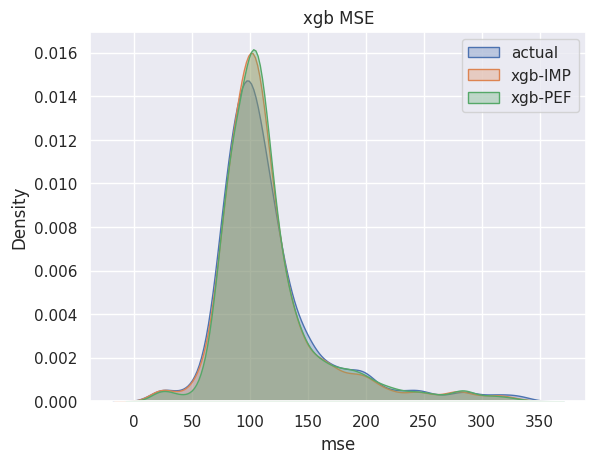

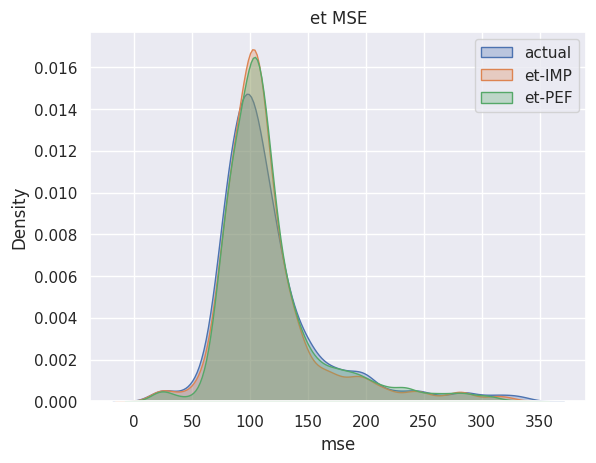

In [ ]:
for j in range(len(estimators_para_imp)):
  sns.kdeplot(data = PEF_test, x = 'mse', label = 'actual', fill = True, alpha = 0.3)
  (name, clf) = estimators_para_imp[j]
  y_pred_clf = clf.predict(X_test)
  # print(f'{name} with {mean_squared_error(y_test, y_pred_clf, squared = False, multioutput = "raw_values")}')
  ROP_clf = ROP(y_pred_clf[:,-1], X_test[:,2], X_test[:,3])
  MSE_clf = MSE(ROP_clf, y_pred_clf[:,0], X_test[:,1], X_test[:,2], X_test[:,3], dp_test[:])
  sns.kdeplot(MSE_clf, label = f'{name}-IMP', fill = True, alpha = 0.3)
  # plt.title('MSE')
  # plt.legend()
  # plt.show()
  # None
  # sns.kdeplot(data = PEF_test, x = 'mse', label = 'actual', fill = True, alpha = 0.3)
  (name, clf) = estimators_para_pef[j]
  y_pred_clf = clf.predict(X_test)
  # print(f'{name} with {mean_squared_error(y_test, y_pred_clf, squared = False, multioutput = "raw_values")}')
  ROP_clf = y_pred_clf[:,0]
  MSE_clf = y_pred_clf[:,1]
  sns.kdeplot(MSE_clf, label = f'{name}-PEF', fill = True, alpha = 0.3)
  plt.title(f'{name} MSE')
  plt.legend()
  plt.show()
  None

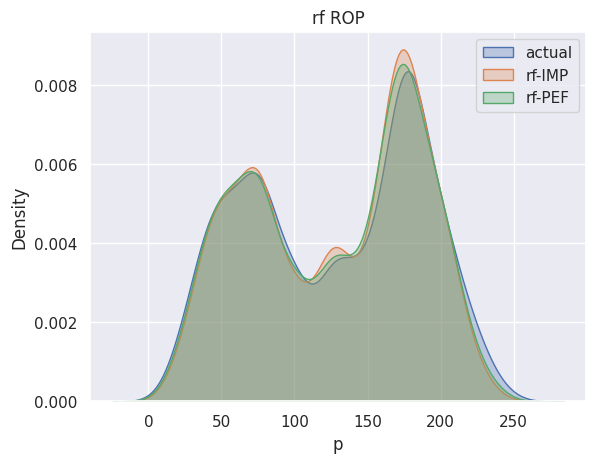

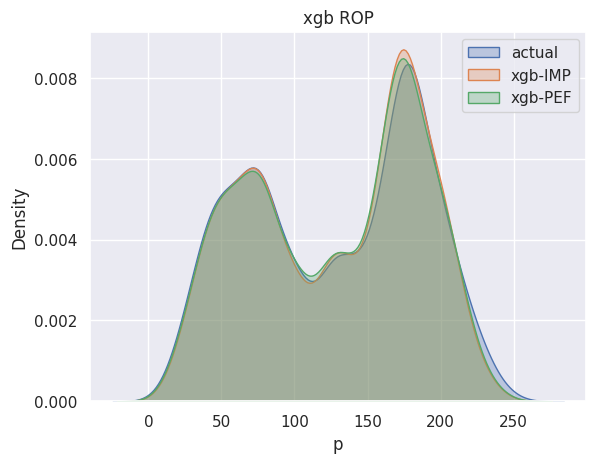

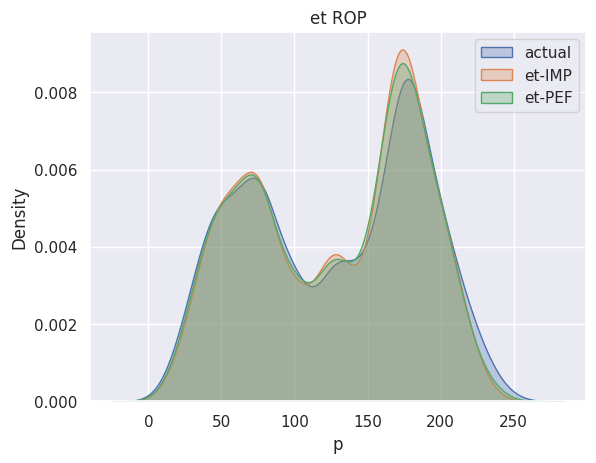

In [ ]:
for j in range(len(estimators_para_imp)):
  sns.kdeplot(data = PEF_test, x = 'p', label = 'actual', fill = True, alpha = 0.3)
  (name, clf) = estimators_para_imp[j]
  y_pred_clf = clf.predict(X_test)
  # print(f'{name} with {mean_squared_error(y_test, y_pred_clf, squared = False, multioutput = "raw_values")}')
  ROP_clf = ROP(y_pred_clf[:,-1], X_test[:,2], X_test[:,3])
  # MSE_clf = MSE(ROP_clf, y_pred_clf[:,0], X_test[:,1], X_test[:,2], X_test[:,3], dp_test[:])
  sns.kdeplot(ROP_clf, label = f'{name}-IMP', fill = True, alpha = 0.3)
  # plt.title('MSE')
  # plt.legend()
  # plt.show()
  # None
  # sns.kdeplot(data = PEF_test, x = 'mse', label = 'actual', fill = True, alpha = 0.3)
  (name, clf) = estimators_para_pef[j]
  y_pred_clf = clf.predict(X_test)
  # print(f'{name} with {mean_squared_error(y_test, y_pred_clf, squared = False, multioutput = "raw_values")}')
  ROP_clf = y_pred_clf[:,0]
  MSE_clf = y_pred_clf[:,1]
  sns.kdeplot(ROP_clf, label = f'{name}-PEF', fill = True, alpha = 0.3)
  plt.title(f'{name} ROP')
  plt.legend()
  plt.show()
  None

In [ ]:
NRMSE_values= [0]*len(estimators_para_imp)
model_names = [0]*len(estimators_para_imp)
for j in range(len(estimators_para_imp)):
  (name, clf) = estimators_para_imp[j]
  y_pred_clf = clf.predict(X_test)
  ROP_clf = ROP(y_pred_clf[:,-1], X_test[:,2], X_test[:,3])
  MSE_clf = MSE(ROP_clf, y_pred_clf[:,0], X_test[:,1], X_test[:,2], X_test[:,3], dp_test[:])
  # print(f'{name} loss: {loss_fct(PEF_test.values[:,1], MSE_clf)}, Nloss: {loss_fct(PEF_test.values[:,1], MSE_clf) / (np.max(PEF_test.values[:,1]) - np.min(PEF_test.values[:,1]) )}') ## MSE
  NRMSE_imp = loss_fct(PEF_test.values[:,1], MSE_clf) / (np.max(PEF_test.values[:,1]) - np.min(PEF_test.values[:,1]) )
  (name, clf) = estimators_para_pef[j]
  y_pred_clf = clf.predict(X_test)
  ROP_clf = y_pred_clf[:,0]
  MSE_clf = y_pred_clf[:,1]
  NRMSE_pef = loss_fct(PEF_test.values[:,1], MSE_clf) / (np.max(PEF_test.values[:,1]) - np.min(PEF_test.values[:,1]) )
  NRMSE_values[j] = [NRMSE_imp,NRMSE_pef]
  model_names[j] = name

In [ ]:
NRMSE_values

[[0.051854729051894644, 0.06196966596617955],
 [0.04534210843333871, 0.05952825230548485],
 [0.049379374022144554, 0.06033875016341509]]

In [ ]:
model_names

['rf', 'xgb', 'et']

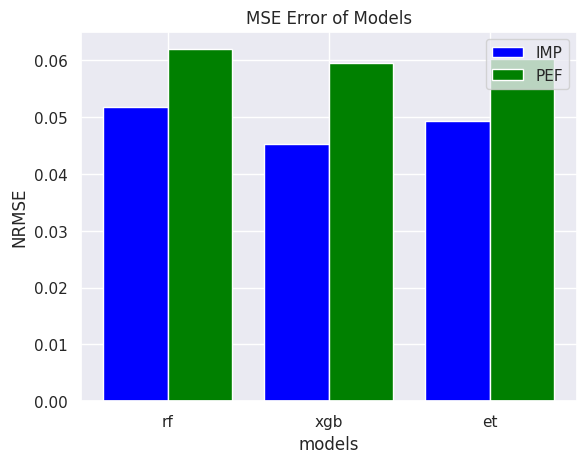

In [ ]:
width = 0.2
x = np.arange(len(estimators_para_imp))
plt.bar(x = x-width, height = np.array(NRMSE_values)[:,0], width = 2*width, color = 'blue')
plt.bar(x = x+width, height = np.array(NRMSE_values)[:,1], width = 2*width, color = 'green')
plt.xticks(x, model_names)
plt.title('MSE Error of Models')
plt.xlabel('models')
plt.ylabel('NRMSE')
plt.legend(['IMP', 'PEF'])
plt.show()

In [ ]:
NRMSE_values= [0]*len(estimators_para_imp)
model_names = [0]*len(estimators_para_imp)
for j in range(len(estimators_para_imp)):
  (name, clf) = estimators_para_imp[j]
  y_pred_clf = clf.predict(X_test)
  ROP_clf = ROP(y_pred_clf[:,-1], X_test[:,2], X_test[:,3])
  # MSE_clf = MSE(ROP_clf, y_pred_clf[:,0], X_test[:,1], X_test[:,2], X_test[:,3], dp_test[:])
  # print(f'{name} loss: {loss_fct(PEF_test.values[:,1], MSE_clf)}, Nloss: {loss_fct(PEF_test.values[:,1], MSE_clf) / (np.max(PEF_test.values[:,1]) - np.min(PEF_test.values[:,1]) )}') ## MSE
  NRMSE_imp = loss_fct(PEF_test.values[:,0], ROP_clf) / (np.max(PEF_test.values[:,0]) - np.min(PEF_test.values[:,0]) )
  (name, clf) = estimators_para_pef[j]
  y_pred_clf = clf.predict(X_test)
  ROP_clf = y_pred_clf[:,0]
  MSE_clf = y_pred_clf[:,1]
  NRMSE_pef = loss_fct(PEF_test.values[:,0], ROP_clf) / (np.max(PEF_test.values[:,0]) - np.min(PEF_test.values[:,0]) )
  NRMSE_values[j] = [NRMSE_imp,NRMSE_pef]
  model_names[j] = name

In [ ]:
NRMSE_values

[[0.05925326936971122, 0.05236244574046858],
 [0.05178200838244099, 0.05200720301823555],
 [0.05776148783387911, 0.052619478394595236]]

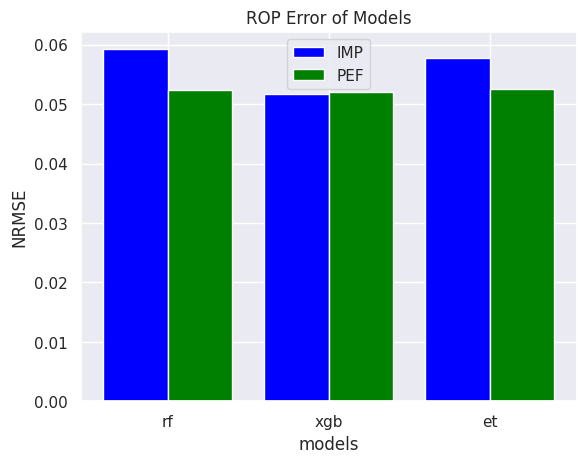

In [ ]:
width = 0.2
x = np.arange(len(estimators_para_imp))
plt.bar(x = x-width, height = np.array(NRMSE_values)[:,0], width = 2*width, color = 'blue')
plt.bar(x = x+width, height = np.array(NRMSE_values)[:,1], width = 2*width, color = 'green')
plt.xticks(x, model_names)
plt.title('ROP Error of Models')
plt.xlabel('models')
plt.ylabel('NRMSE')
plt.legend(['IMP', 'PEF'])
plt.show()

In [ ]:
# width = 0.2
# for j in range(len(estimators_para_imp)):
#   plt.bar(x = j-width, height = NRMSE_values[j][0], width = 2*width, color = 'blue')
#   plt.bar(x = j+width, height = NRMSE_values[j][1], width = 2*width, color = 'green')
# plt.xticks(np.arange(len(estimators_para_imp)), model_names)
# plt.title('MSE Error of Models')
# plt.xlabel('models')
# plt.ylabel('NRMSE')
# plt.legend(['IMP', 'PEF'])
# plt.show()

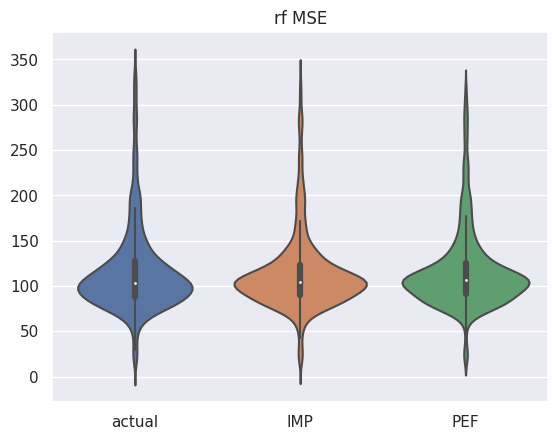

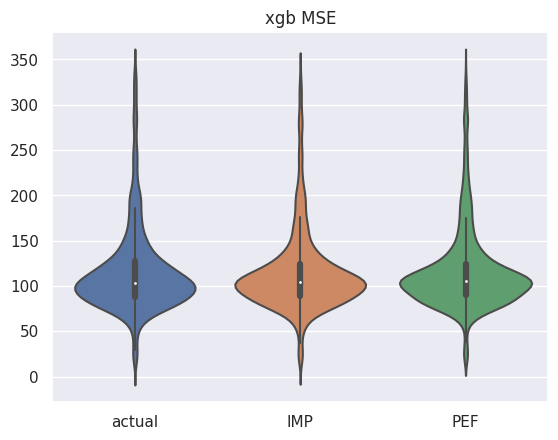

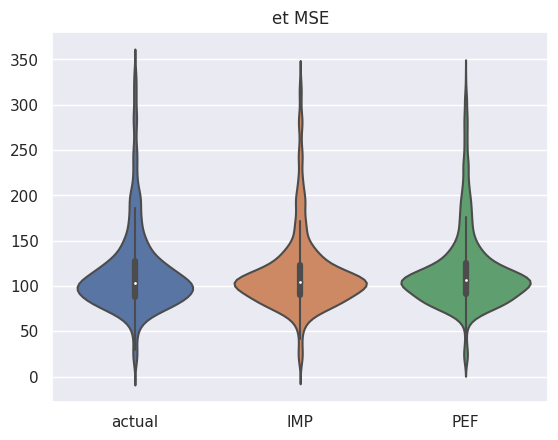

In [ ]:
for j in range(len(estimators_para_imp)):
  data_temp = [0]*3
  data_temp[0] = PEF_test.values[:,1]
  # sns.kdeplot(data = PEF_test, x = 'mse', label = 'actual', fill = True, alpha = 0.3)
  # sns.catplot(data = PEF_test, x= 'mse', label = 'actual', kind = 'violin')
  (name, clf) = estimators_para_imp[j]
  y_pred_clf = clf.predict(X_test)
  # print(f'{name} with {mean_squared_error(y_test, y_pred_clf, squared = False, multioutput = "raw_values")}')
  ROP_clf = ROP(y_pred_clf[:,-1], X_test[:,2], X_test[:,3])
  MSE_clf = MSE(ROP_clf, y_pred_clf[:,0], X_test[:,1], X_test[:,2], X_test[:,3], dp_test[:])
  data_temp[1] = MSE_clf
  # sns.kdeplot(MSE_clf, label = f'{name}-IMP', fill = True, alpha = 0.3)
  # plt.title('MSE')
  # plt.legend()
  # plt.show()
  # None
  # sns.kdeplot(data = PEF_test, x = 'mse', label = 'actual', fill = True, alpha = 0.3)
  (name, clf) = estimators_para_pef[j]
  y_pred_clf = clf.predict(X_test)
  # print(f'{name} with {mean_squared_error(y_test, y_pred_clf, squared = False, multioutput = "raw_values")}')
  ROP_clf = y_pred_clf[:,0]
  MSE_clf = y_pred_clf[:,1]
  # sns.kdeplot(MSE_clf, label = f'{name}-PEF', fill = True, alpha = 0.3)
  data_temp[2] = MSE_clf
  sns.violinplot(data = data_temp)
  plt.xticks(x, ['actual', 'IMP', 'PEF'])
  plt.title(f'{name} MSE')
  # plt.legend()
  plt.show()
  None

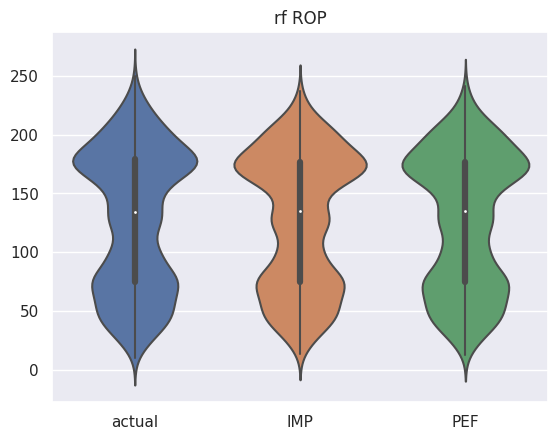

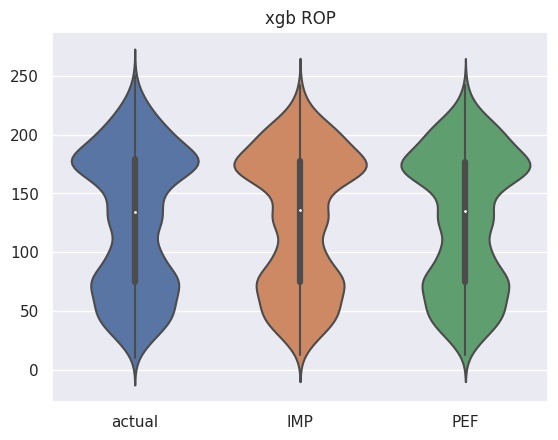

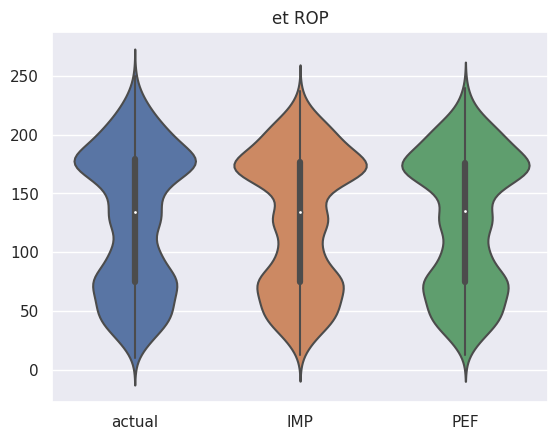

In [ ]:
for j in range(len(estimators_para_imp)):
  data_temp = [0]*3
  data_temp[0] = PEF_test.values[:,0]
  # sns.kdeplot(data = PEF_test, x = 'mse', label = 'actual', fill = True, alpha = 0.3)
  # sns.catplot(data = PEF_test, x= 'mse', label = 'actual', kind = 'violin')
  (name, clf) = estimators_para_imp[j]
  y_pred_clf = clf.predict(X_test)
  # print(f'{name} with {mean_squared_error(y_test, y_pred_clf, squared = False, multioutput = "raw_values")}')
  ROP_clf = ROP(y_pred_clf[:,-1], X_test[:,2], X_test[:,3])
  MSE_clf = MSE(ROP_clf, y_pred_clf[:,0], X_test[:,1], X_test[:,2], X_test[:,3], dp_test[:])
  data_temp[1] = ROP_clf
  # sns.kdeplot(MSE_clf, label = f'{name}-IMP', fill = True, alpha = 0.3)
  # plt.title('MSE')
  # plt.legend()
  # plt.show()
  # None
  # sns.kdeplot(data = PEF_test, x = 'mse', label = 'actual', fill = True, alpha = 0.3)
  (name, clf) = estimators_para_pef[j]
  y_pred_clf = clf.predict(X_test)
  # print(f'{name} with {mean_squared_error(y_test, y_pred_clf, squared = False, multioutput = "raw_values")}')
  ROP_clf = y_pred_clf[:,0]
  MSE_clf = y_pred_clf[:,1]
  # sns.kdeplot(MSE_clf, label = f'{name}-PEF', fill = True, alpha = 0.3)
  data_temp[2] = ROP_clf
  sns.violinplot(data = data_temp)
  plt.xticks(x, ['actual', 'IMP', 'PEF'])
  plt.title(f'{name} ROP')
  # plt.legend()
  plt.show()
  None

# End